In [ ]:
### Install Qiskit and relevant packages, if needed

%pip install qiskit[visualization]==1.0.2
%pip install qiskit_ibm_runtime
%pip install qiskit_aer
%pip install qiskit-transpiler-service
%pip install graphviz
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 4.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=5f88412ce411287d227c94b363fe12d05495f6f4cc29e245f2a5ed62408515cb
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [1]:
# Set up api token
%set_env QXToken=insertToken

env: QXToken=insertToken


In [ ]:
# Imports

from qiskit.circuit.random import random_circuit
from qiskit.circuit.library import XGate, YGate
from qiskit_ibm_runtime.fake_provider import FakeTorino, FakeOsaka
from qiskit.transpiler import InstructionProperties, PassManager
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.transpiler.preset_passmanagers.plugin import list_stage_plugins
from qiskit.transpiler.timing_constraints import TimingConstraints
from qiskit.transpiler.passes.scheduling import ASAPScheduleAnalysis,PadDynamicalDecoupling
from qiskit.visualization.timeline import draw, IQXStandard
from qiskit.transpiler import StagedPassManager
from qiskit.visualization import plot_circuit_layout
import matplotlib.pyplot as plt
import numpy as np

# Setup the grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab2_ex1,
    grade_lab2_ex2,
    grade_lab2_ex3,
    grade_lab2_ex4,
    grade_lab2_ex5
)

In [ ]:
from util import version_check

version_check()

You have the right version! Enjoy the challenge!


In [ ]:
ans = {}

# Place the correct letter next to the corresponding stage, inside a parenthesis
# example:  ans["test"] = "M"

ans["init"] = "C"
ans["layout"] = "D"
ans["routing"] = "B"
ans["translation"] = "F"
ans["optimization"] = "A"
ans["scheduling"] = "E"

# Submit your answer using following code

grade_lab2_ex1(ans)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
### Create the scoring function

def scoring( qc, backend):
    from util import transpile_scoring

    layout = qc.layout
    fidelity = transpile_scoring(qc, layout, backend)
    score = 1 - fidelity

    return score

In [ ]:
# Submit your answer using following code

grade_lab2_ex2(scoring)

0.19502950919513484
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


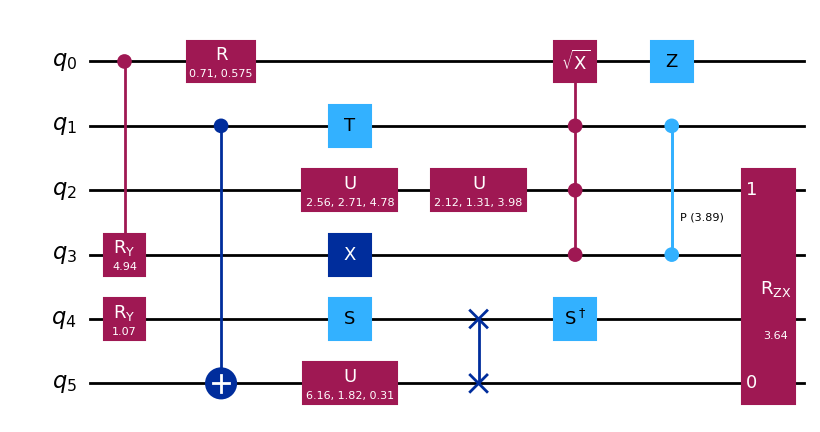

In [ ]:
### Create a random circuit

## DO NOT CHANGE THE SEED NUMBER
seed = 10000

## Create circuit

num_qubits = 6
depth = 4
qc = random_circuit(num_qubits,depth,measure=False, seed=seed)

qc.draw('mpl')

In [ ]:
## Save FakeTorino as backend

backend = FakeTorino()

circuit_depths = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}
gate_counts = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

scores = {
    'opt_lv_0': None,
    'opt_lv_1': None,
    'opt_lv_2': None,
    'opt_lv_3': None,
}

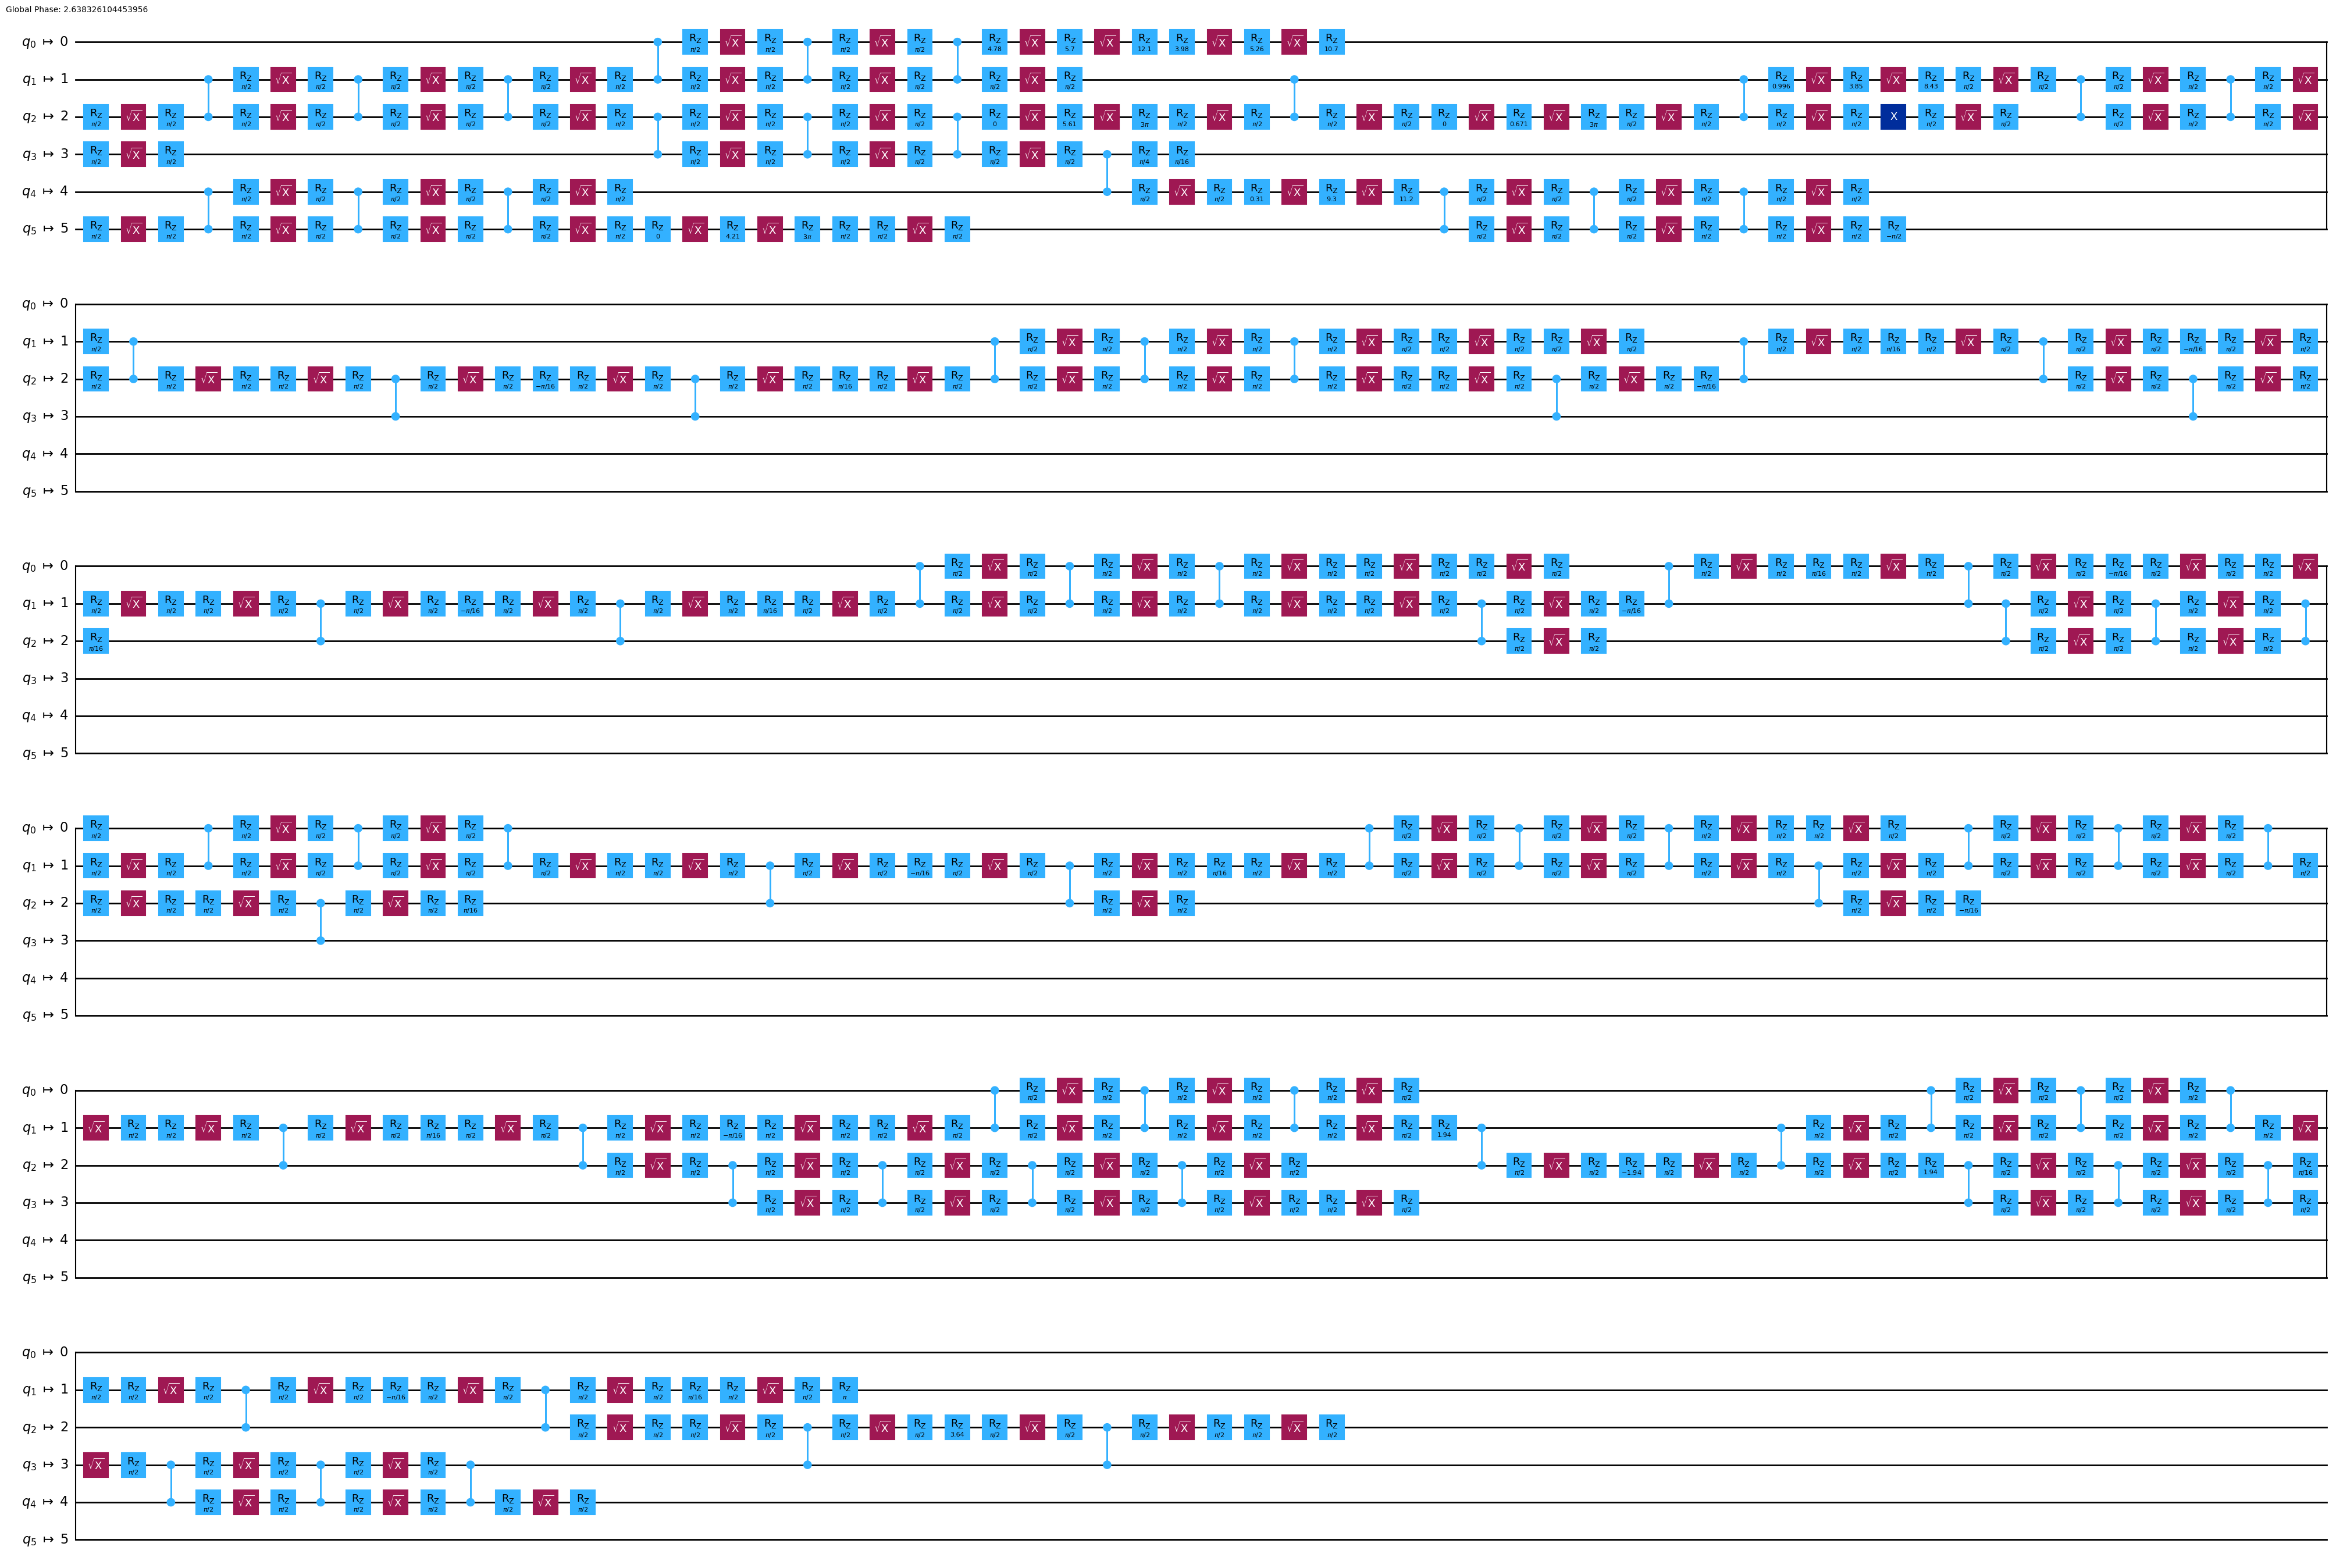

In [ ]:
# Make a pass manager with our desired optimization level and backend
pm_lv0 = generate_preset_pass_manager(backend=backend, optimization_level=0, seed_transpiler=seed)

# Run for our random circuit
tr_lv0 = pm_lv0.run(qc)

# uncomment the next line to draw circuit
tr_lv0.draw('mpl', idle_wires=False, fold=60)

In [ ]:
### Your code here ###

circuit_depths['opt_lv_0'] = tr_lv0.depth()
gate_counts['opt_lv_0'] = tr_lv0.size()
scores['opt_lv_0'] = scoring(tr_lv0, backend)

### Don't change code after this line ###

print("Optimization level 0 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_0'])
print("Gate count:", gate_counts['opt_lv_0'])
print("Score:", scores['opt_lv_0'])

Optimization level 0 results
Circuit depth: 334
Gate count: 659
Score: 0.378009145088254


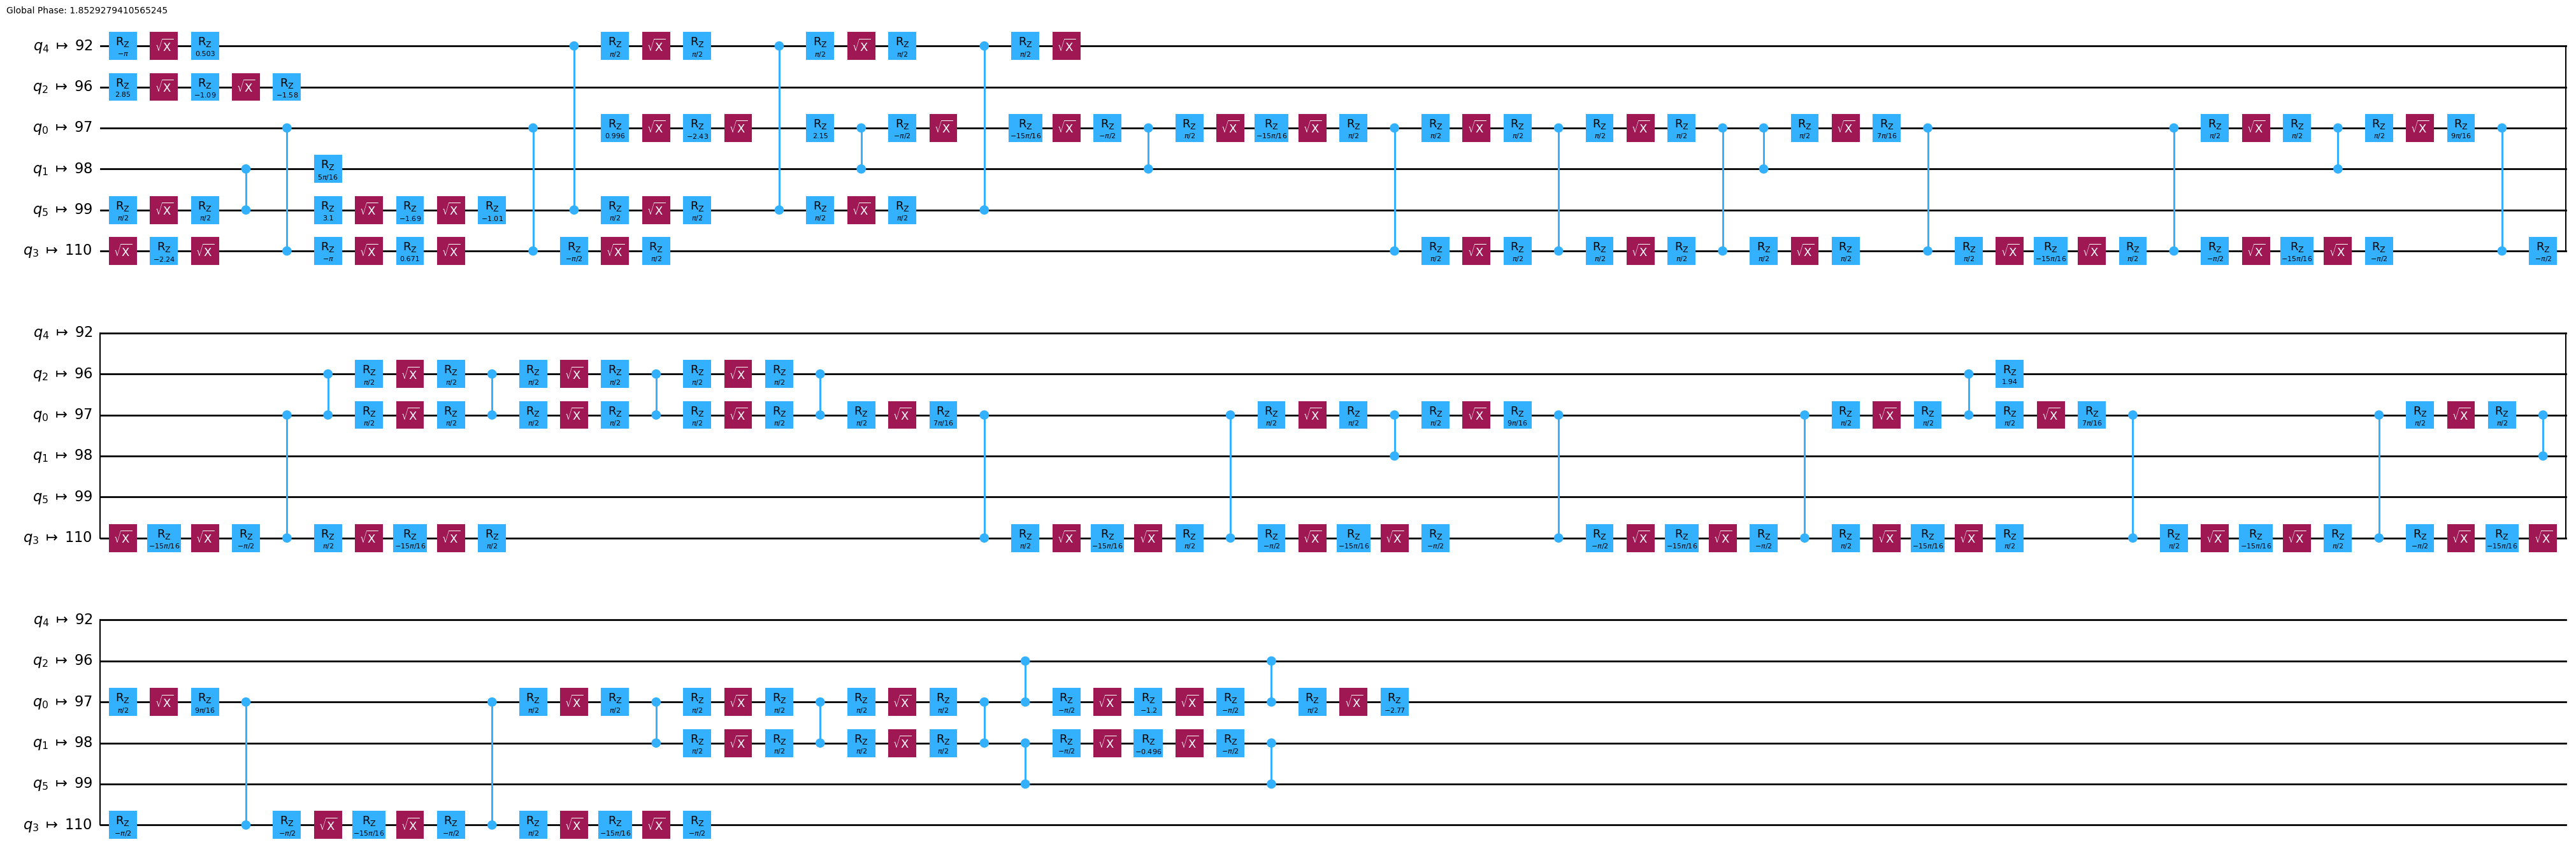

In [ ]:
# Make a pass manager with our desired optimization level and backend
pm_lv1 = generate_preset_pass_manager(backend=backend, optimization_level=1, seed_transpiler=seed)

# Run for our random circuit
tr_lv1 = pm_lv1.run(qc)

# uncomment the next line to draw circuit
tr_lv1.draw('mpl', idle_wires=False, fold=60)

In [ ]:
### Your code here ###

circuit_depths['opt_lv_1'] = tr_lv1.depth()
gate_counts['opt_lv_1'] = tr_lv1.size()
scores['opt_lv_1'] = scoring(tr_lv1, backend)

### Don't change code after this line ###

print("Optimization level 1 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_1'])
print("Gate count:", gate_counts['opt_lv_1'])
print("Score:", scores['opt_lv_1'])

Optimization level 1 results
Circuit depth: 147
Gate count: 247
Score: 0.10053438782707702


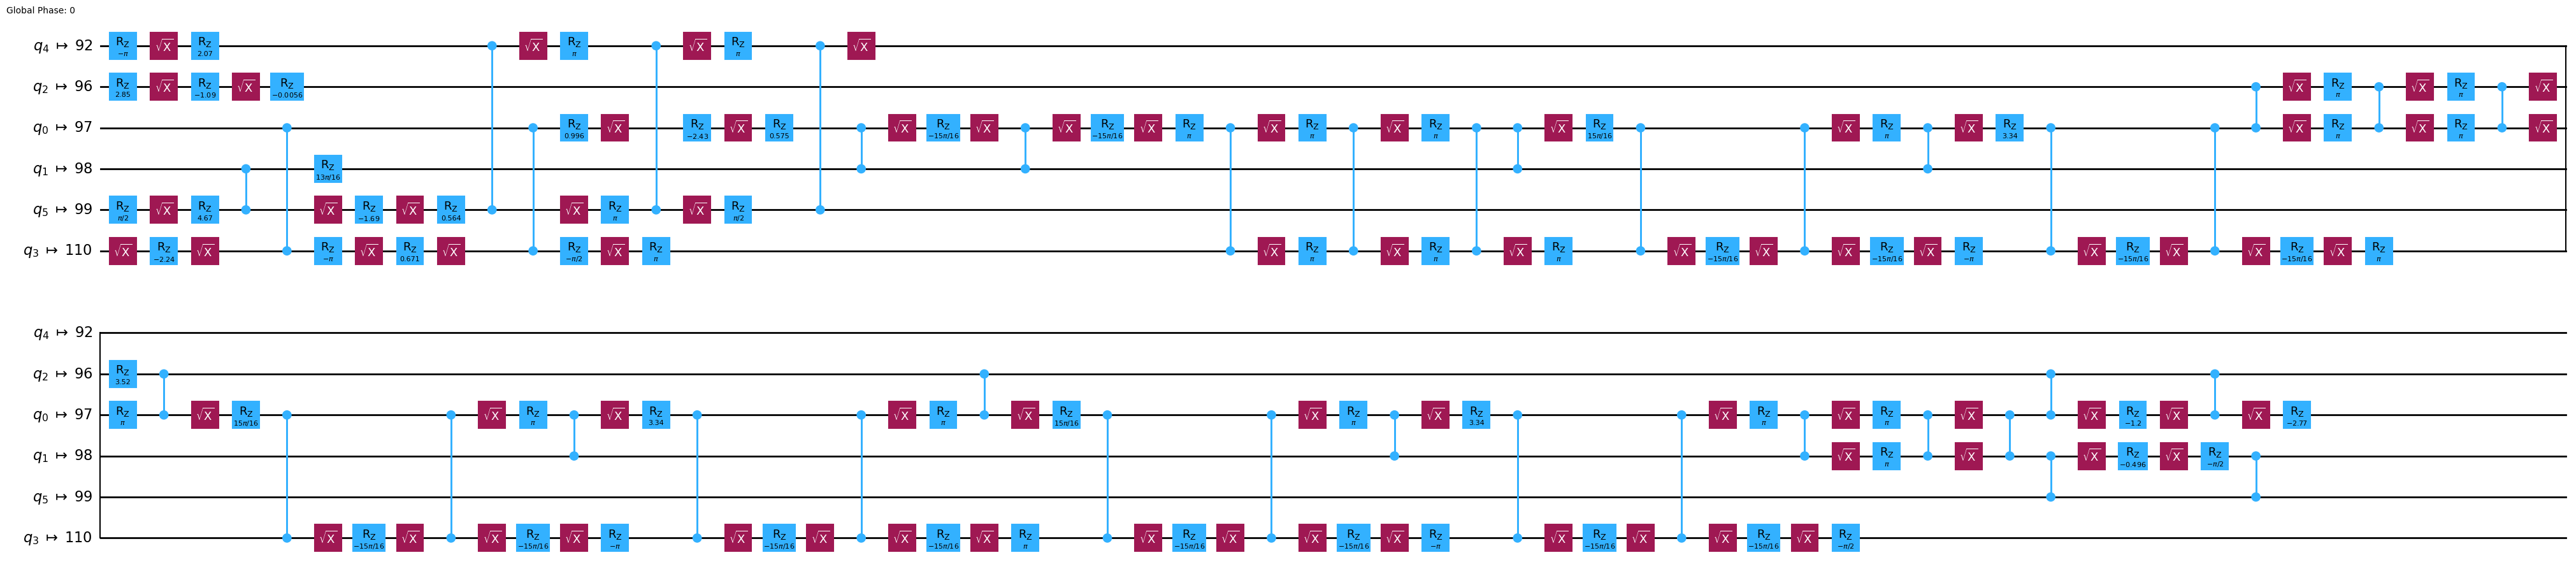

In [ ]:
# Make a pass manager with our desired optimization level and backend
pm_lv2 = generate_preset_pass_manager(backend=backend, optimization_level=2, seed_transpiler=seed)

# Run for our random circuit
tr_lv2 = pm_lv2.run(qc)

# uncomment the next line to draw circuit
tr_lv2.draw('mpl', idle_wires=False, fold=60)

In [ ]:
### Your code here ###

circuit_depths['opt_lv_2'] = tr_lv2.depth()
gate_counts['opt_lv_2'] = tr_lv2.size()
scores['opt_lv_2'] = scoring(tr_lv2, backend)

### Don't change code after this line ###

print("Optimization level 2 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_2'])
print("Gate count:", gate_counts['opt_lv_2'])
print("Score:", scores['opt_lv_2'])

Optimization level 2 results
Circuit depth: 110
Gate count: 187
Score: 0.10053438782707702


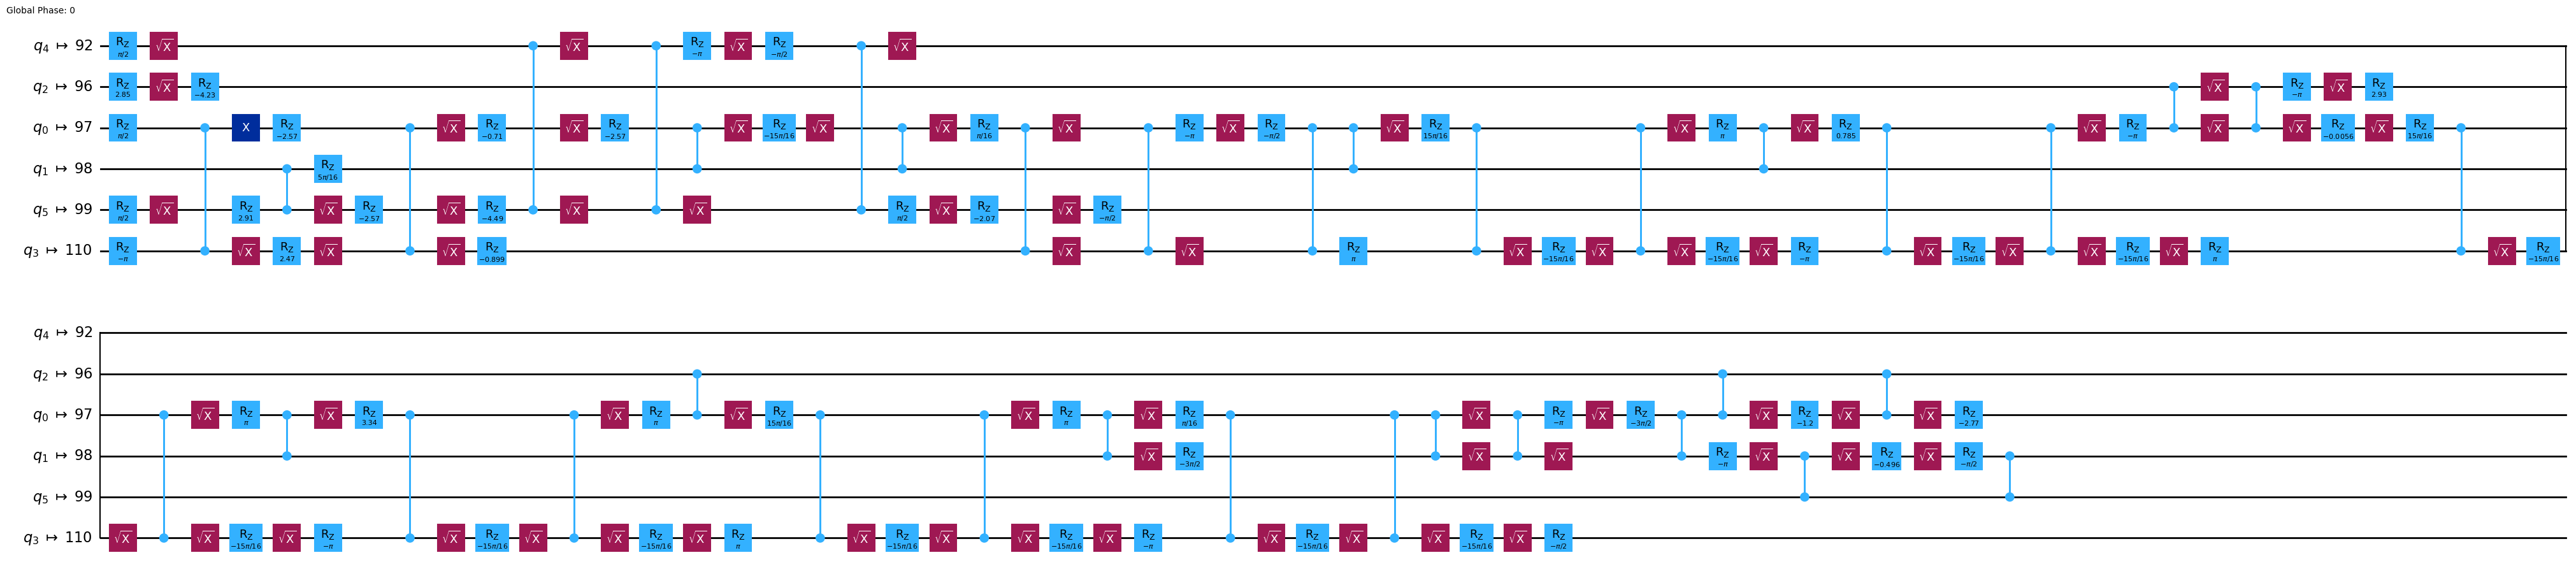

In [ ]:
pm_lv3 = generate_preset_pass_manager(backend=backend, optimization_level=3, seed_transpiler=seed)

tr_lv3 = pm_lv3.run(qc)

# uncomment to draw circuit
tr_lv3.draw('mpl', idle_wires=False, fold=60)

In [ ]:
### Your code here ###

circuit_depths['opt_lv_3'] = tr_lv3.depth()
gate_counts['opt_lv_3'] = tr_lv3.size()
scores['opt_lv_3'] = scoring(tr_lv3, backend)

### Don't change code after this line ###

print("Optimization level 3 results")
print("====================")
print("Circuit depth:", circuit_depths['opt_lv_3'])
print("Gate count:", gate_counts['opt_lv_3'])
print("Score:", scores['opt_lv_3'])

Optimization level 3 results
Circuit depth: 101
Gate count: 177
Score: 0.09612632219732442


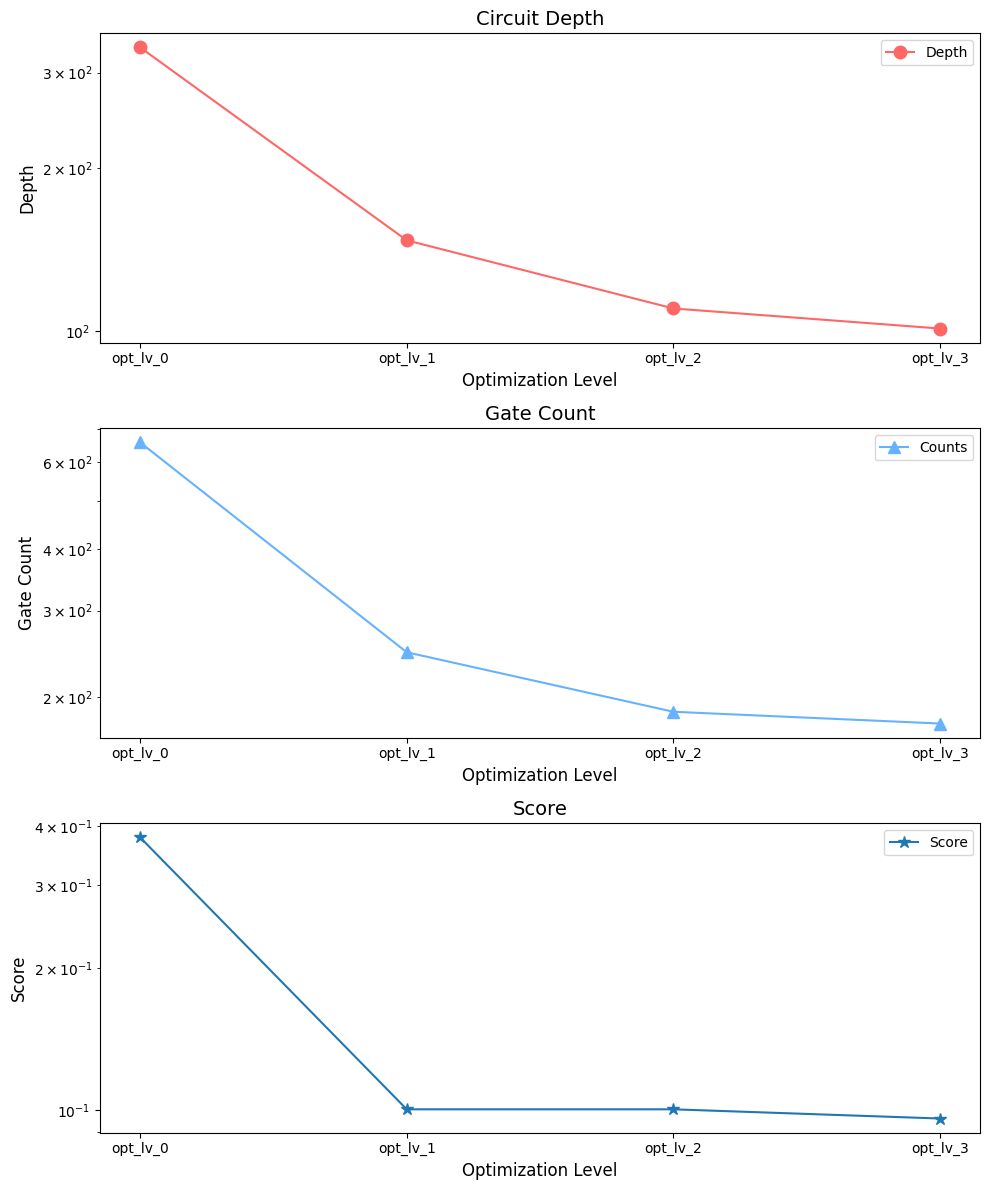

In [ ]:
colors = ['#FF6666', '#66B2FF']
ax = ["opt_lv_0", "opt_lv_1", "opt_lv_2", "opt_lv_3"]
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Circuit Depth
ax1.semilogy(ax, [circuit_depths[key] for key in ax],'o-',markersize=9, color='#FF6666', label="Depth")
ax1.set_xlabel("Optimization Level", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
ax2.semilogy(ax, [gate_counts[key] for key in ax],'^-',markersize=9, color='#66B2FF', label="Counts")
ax2.set_xlabel("Optimization Level", fontsize=12)
ax2.set_ylabel("Gate Count", fontsize=12)
ax2.set_title("Gate Count", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Score of Transpiled Circuit
ax3.semilogy(ax, [scores[key] for key in ax],'*-',markersize=9, label="Score")
ax3.set_xlabel("Optimization Level", fontsize=12)
ax3.set_ylabel("Score", fontsize=12)
ax3.set_title("Score", fontsize=14)
ax3.legend(fontsize=10)

fig.tight_layout()
plt.show()

In [ ]:
# Submit your answer using following code

ans = [pm_lv0, pm_lv1, pm_lv2, pm_lv3]

grade_lab2_ex3(ans)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
list_stage_plugins("init")

print("Plugins run by default init stage")
print("=================================")

for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, init_method="default", seed_transpiler=1000)
    for task in pm.init.to_flow_controller().tasks:
        print(" -", type(task).__name__)

Plugins run by default init stage

Optimization level 0:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator

Optimization level 1:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - InverseCancellation

Optimization level 2:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - InverseCancellation

Optimization level 3:
 - UnitarySynthesis
 - HighLevelSynthesis
 - BasisTranslator
 - OptimizeSwapBeforeMeasure
 - RemoveDiagonalGatesBeforeMeasure
 - InverseCancellation


Plugins run by default layout stage

Optimization level 0:
 -  TrivialLayout
[1, 4, 2, 0, 5, 3]


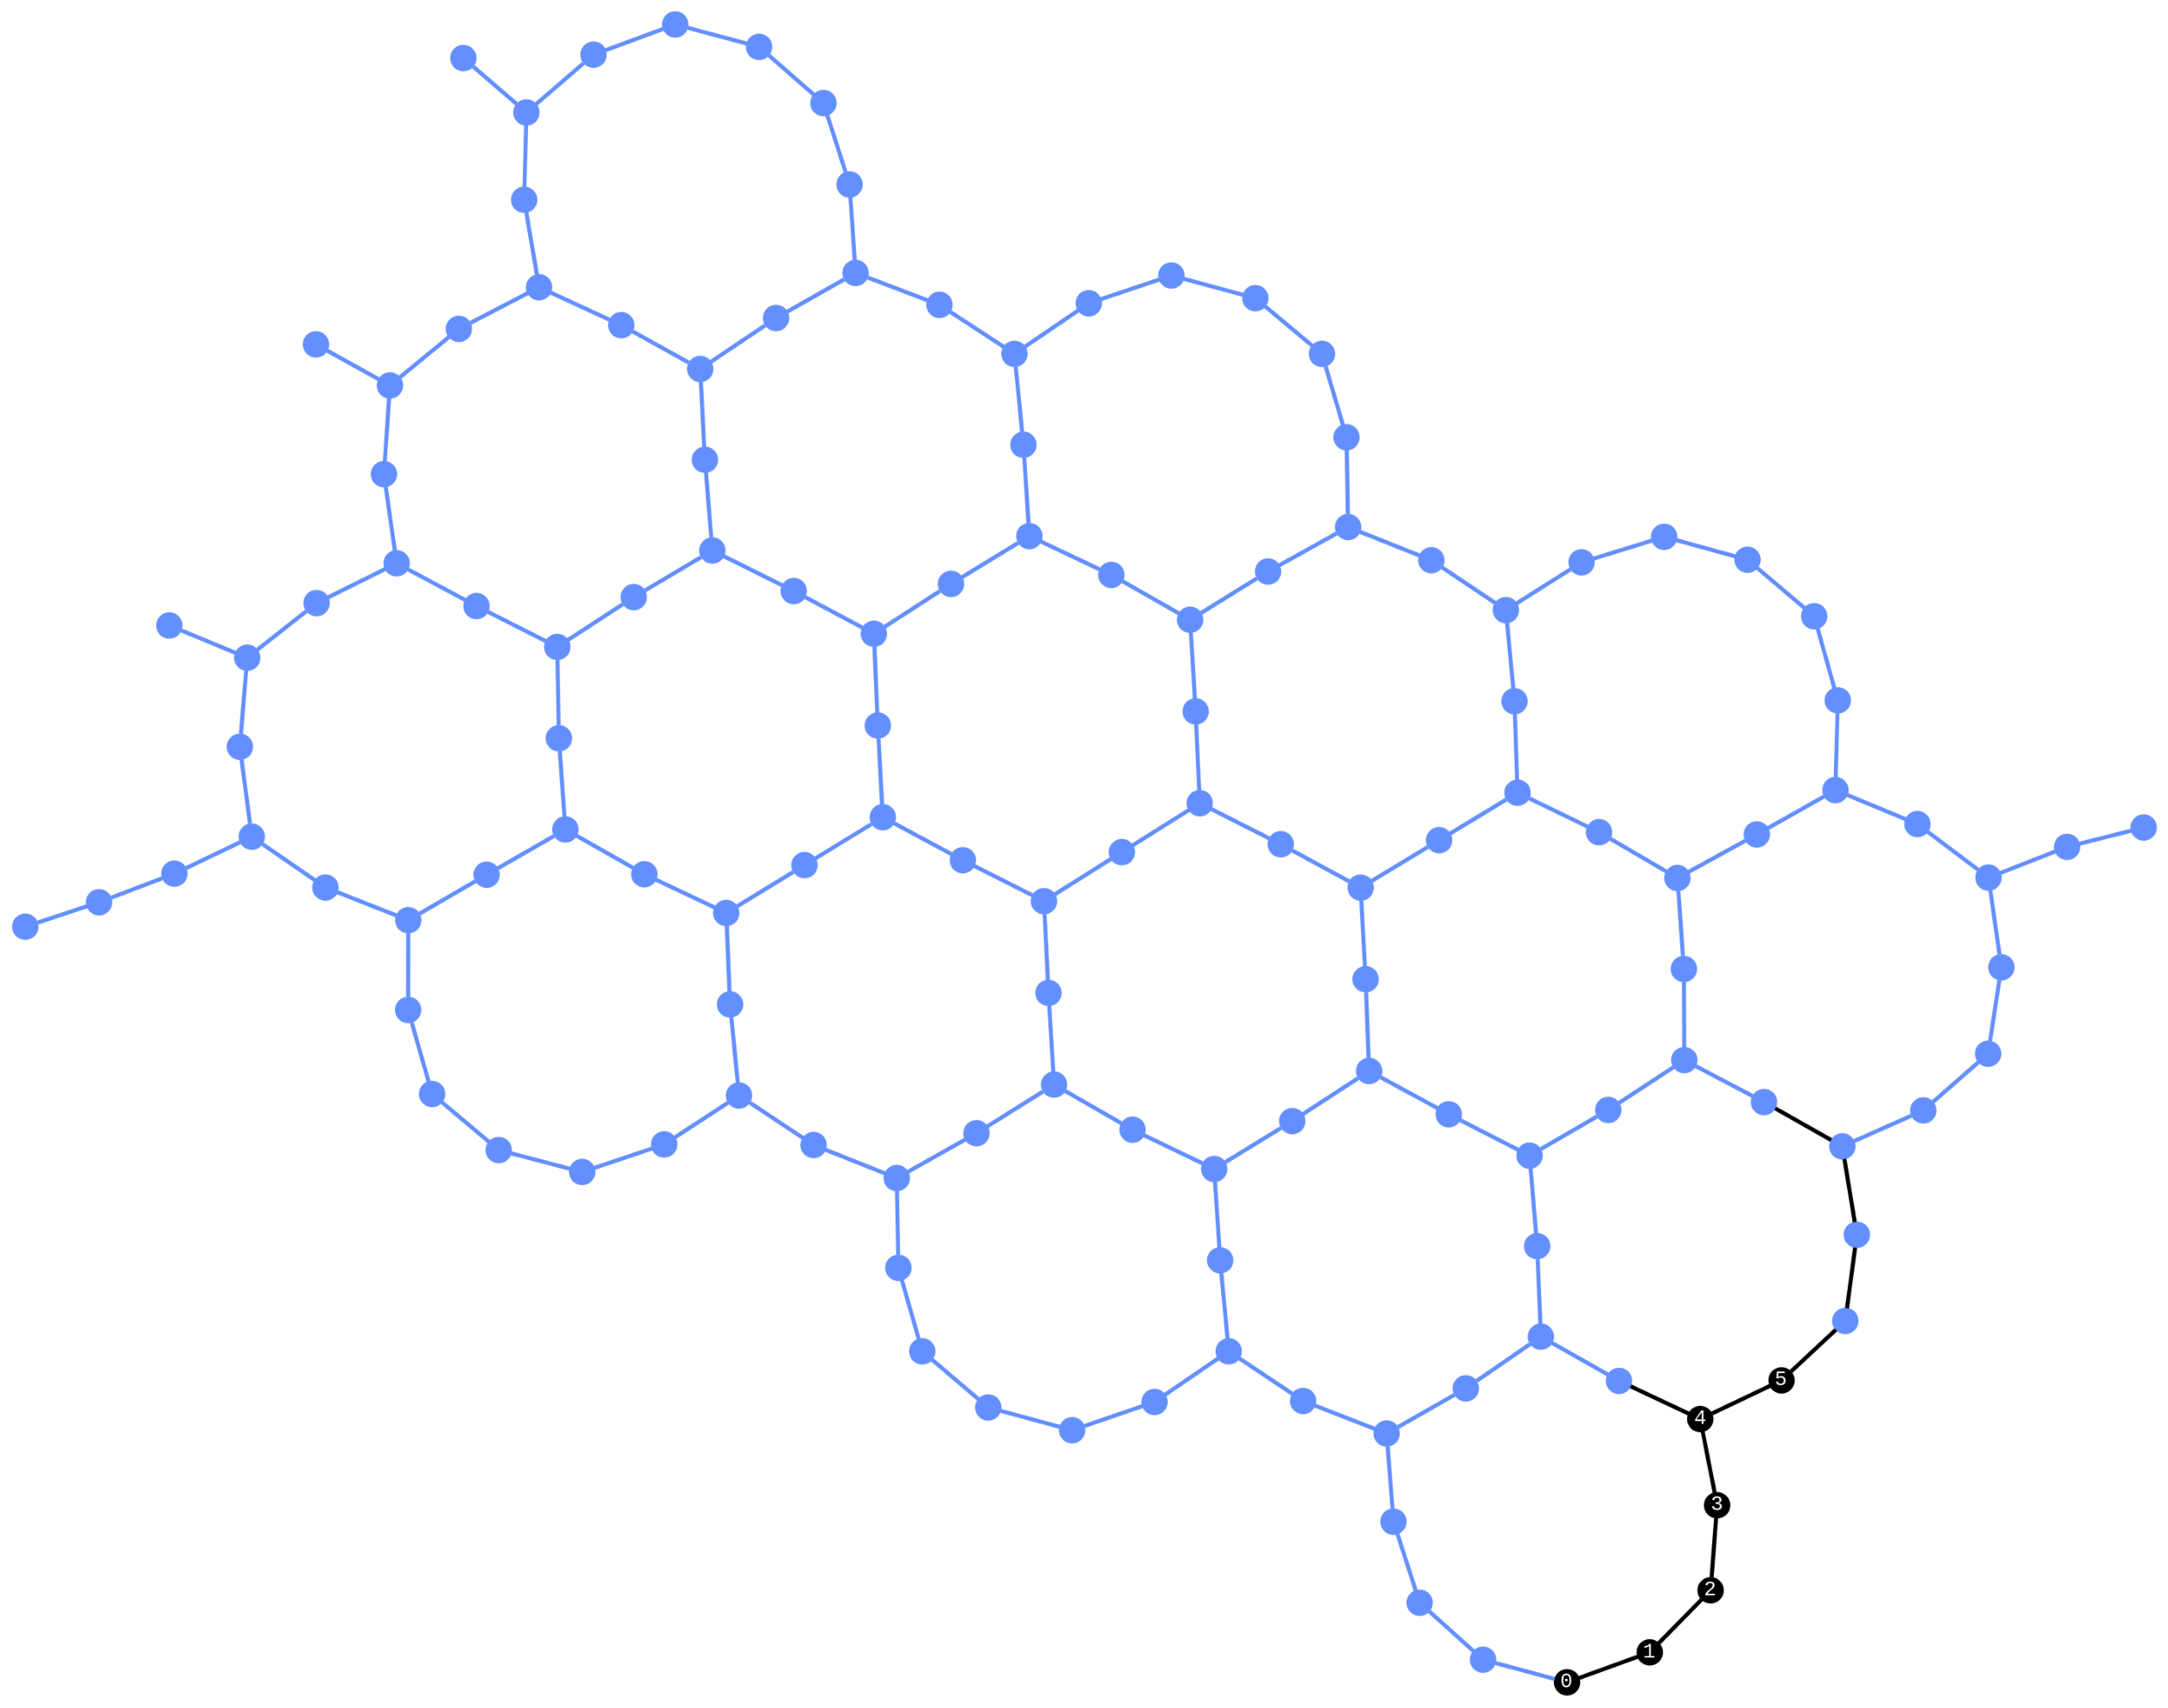


Optimization level 1:
 -  TrivialLayout
 -  CheckMap
 -  VF2Layout
 -  BarrierBeforeFinalMeasurements
 -  SabreLayout
 -  FlowControllerLinear
[85, 84, 83, 93, 73, 82]


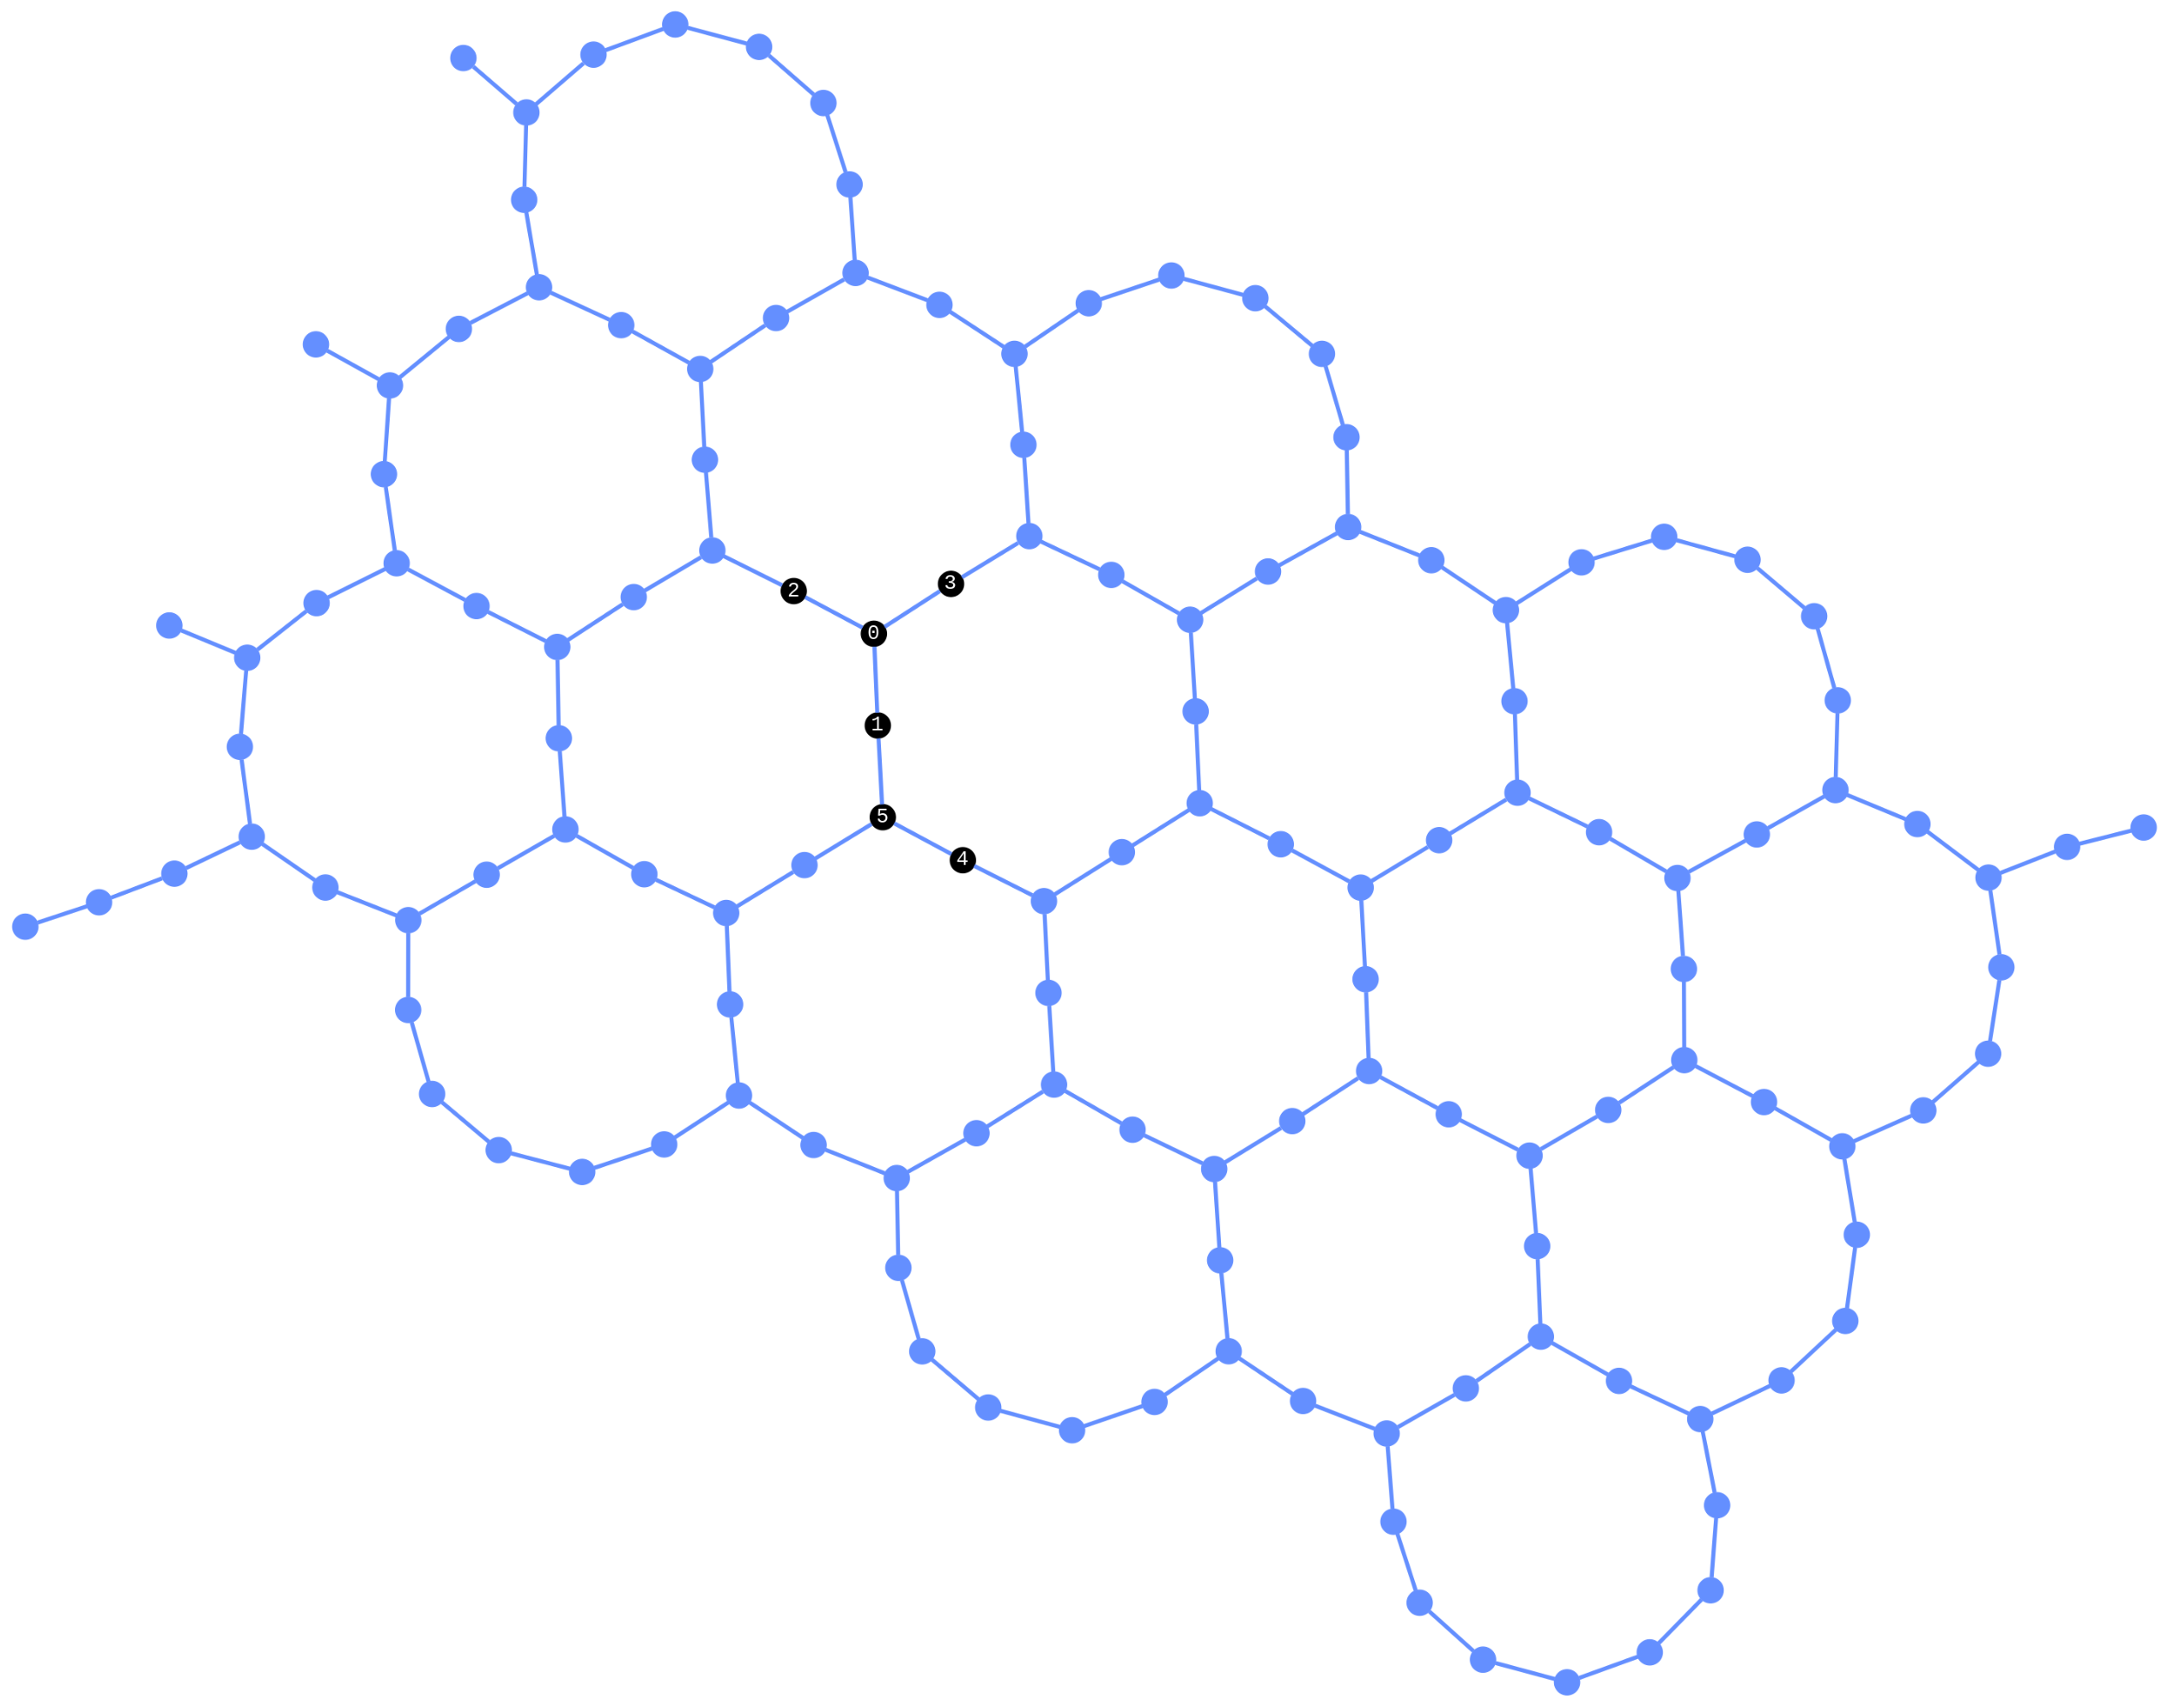


Optimization level 2:
 -  VF2Layout
 -  BarrierBeforeFinalMeasurements
 -  SabreLayout
 -  FlowControllerLinear
[85, 84, 83, 93, 73, 82]


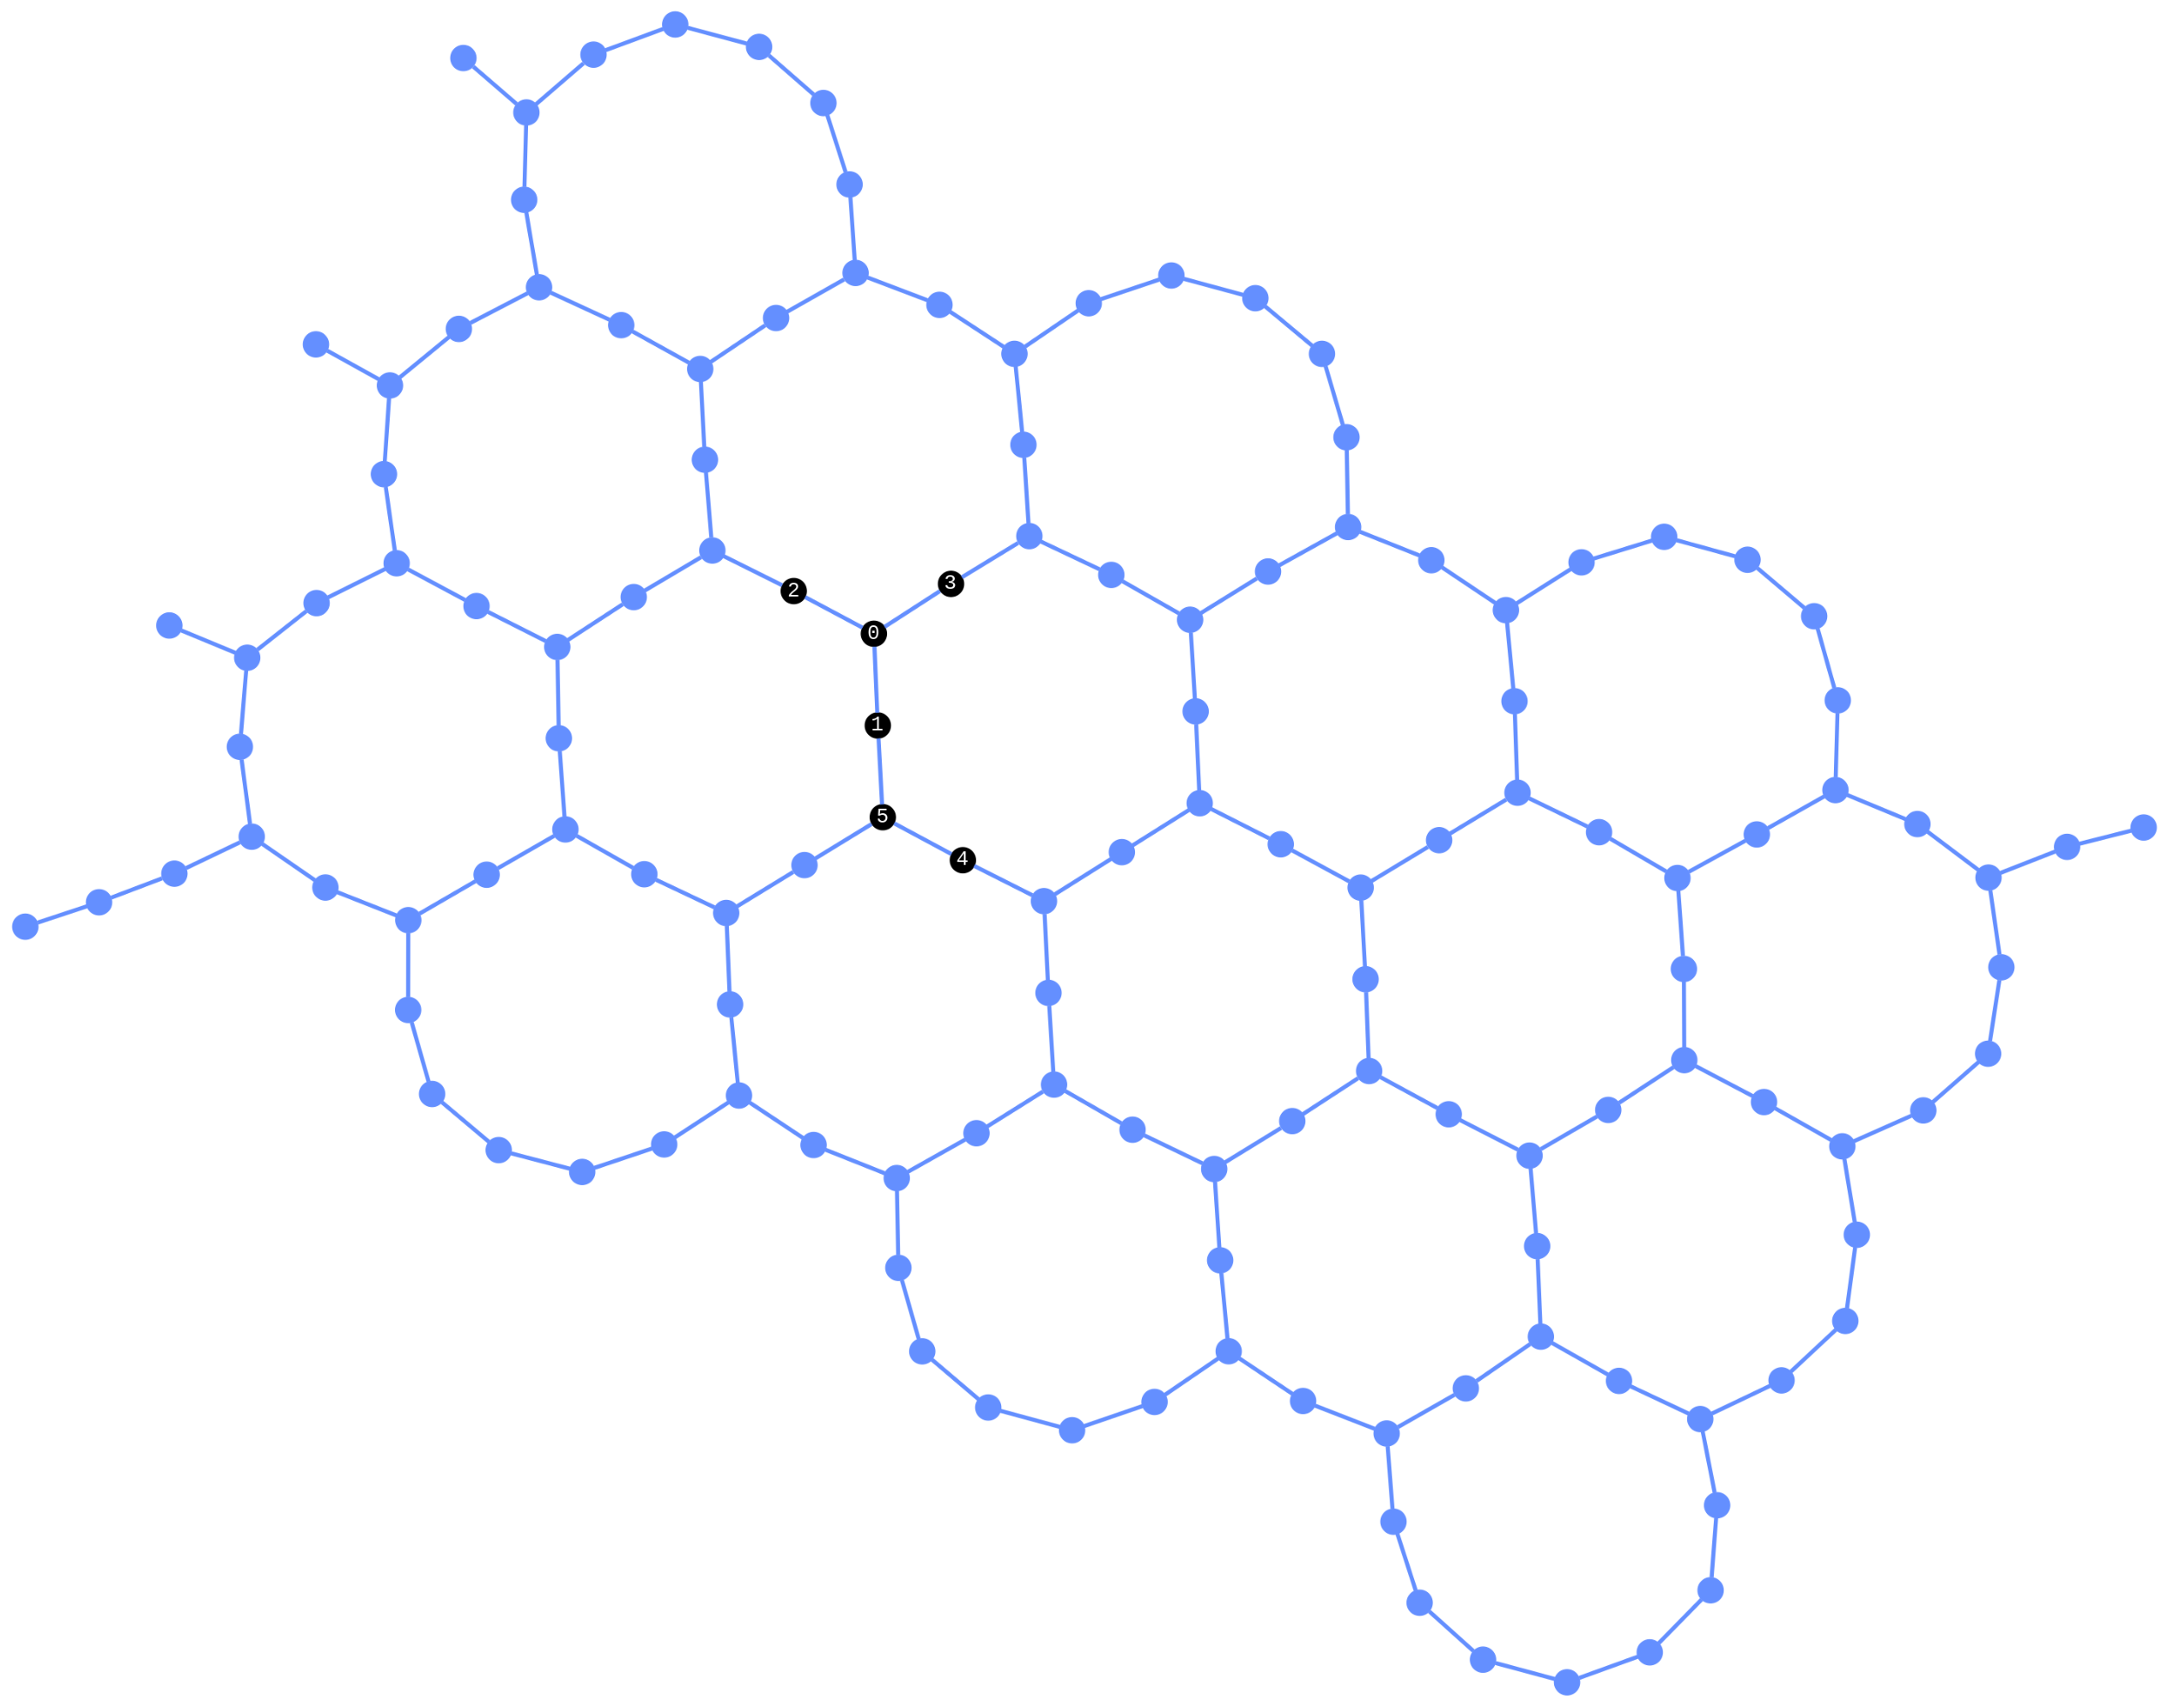


Optimization level 3:
 -  VF2Layout
 -  BarrierBeforeFinalMeasurements
 -  SabreLayout
 -  FlowControllerLinear
[85, 84, 83, 93, 73, 82]


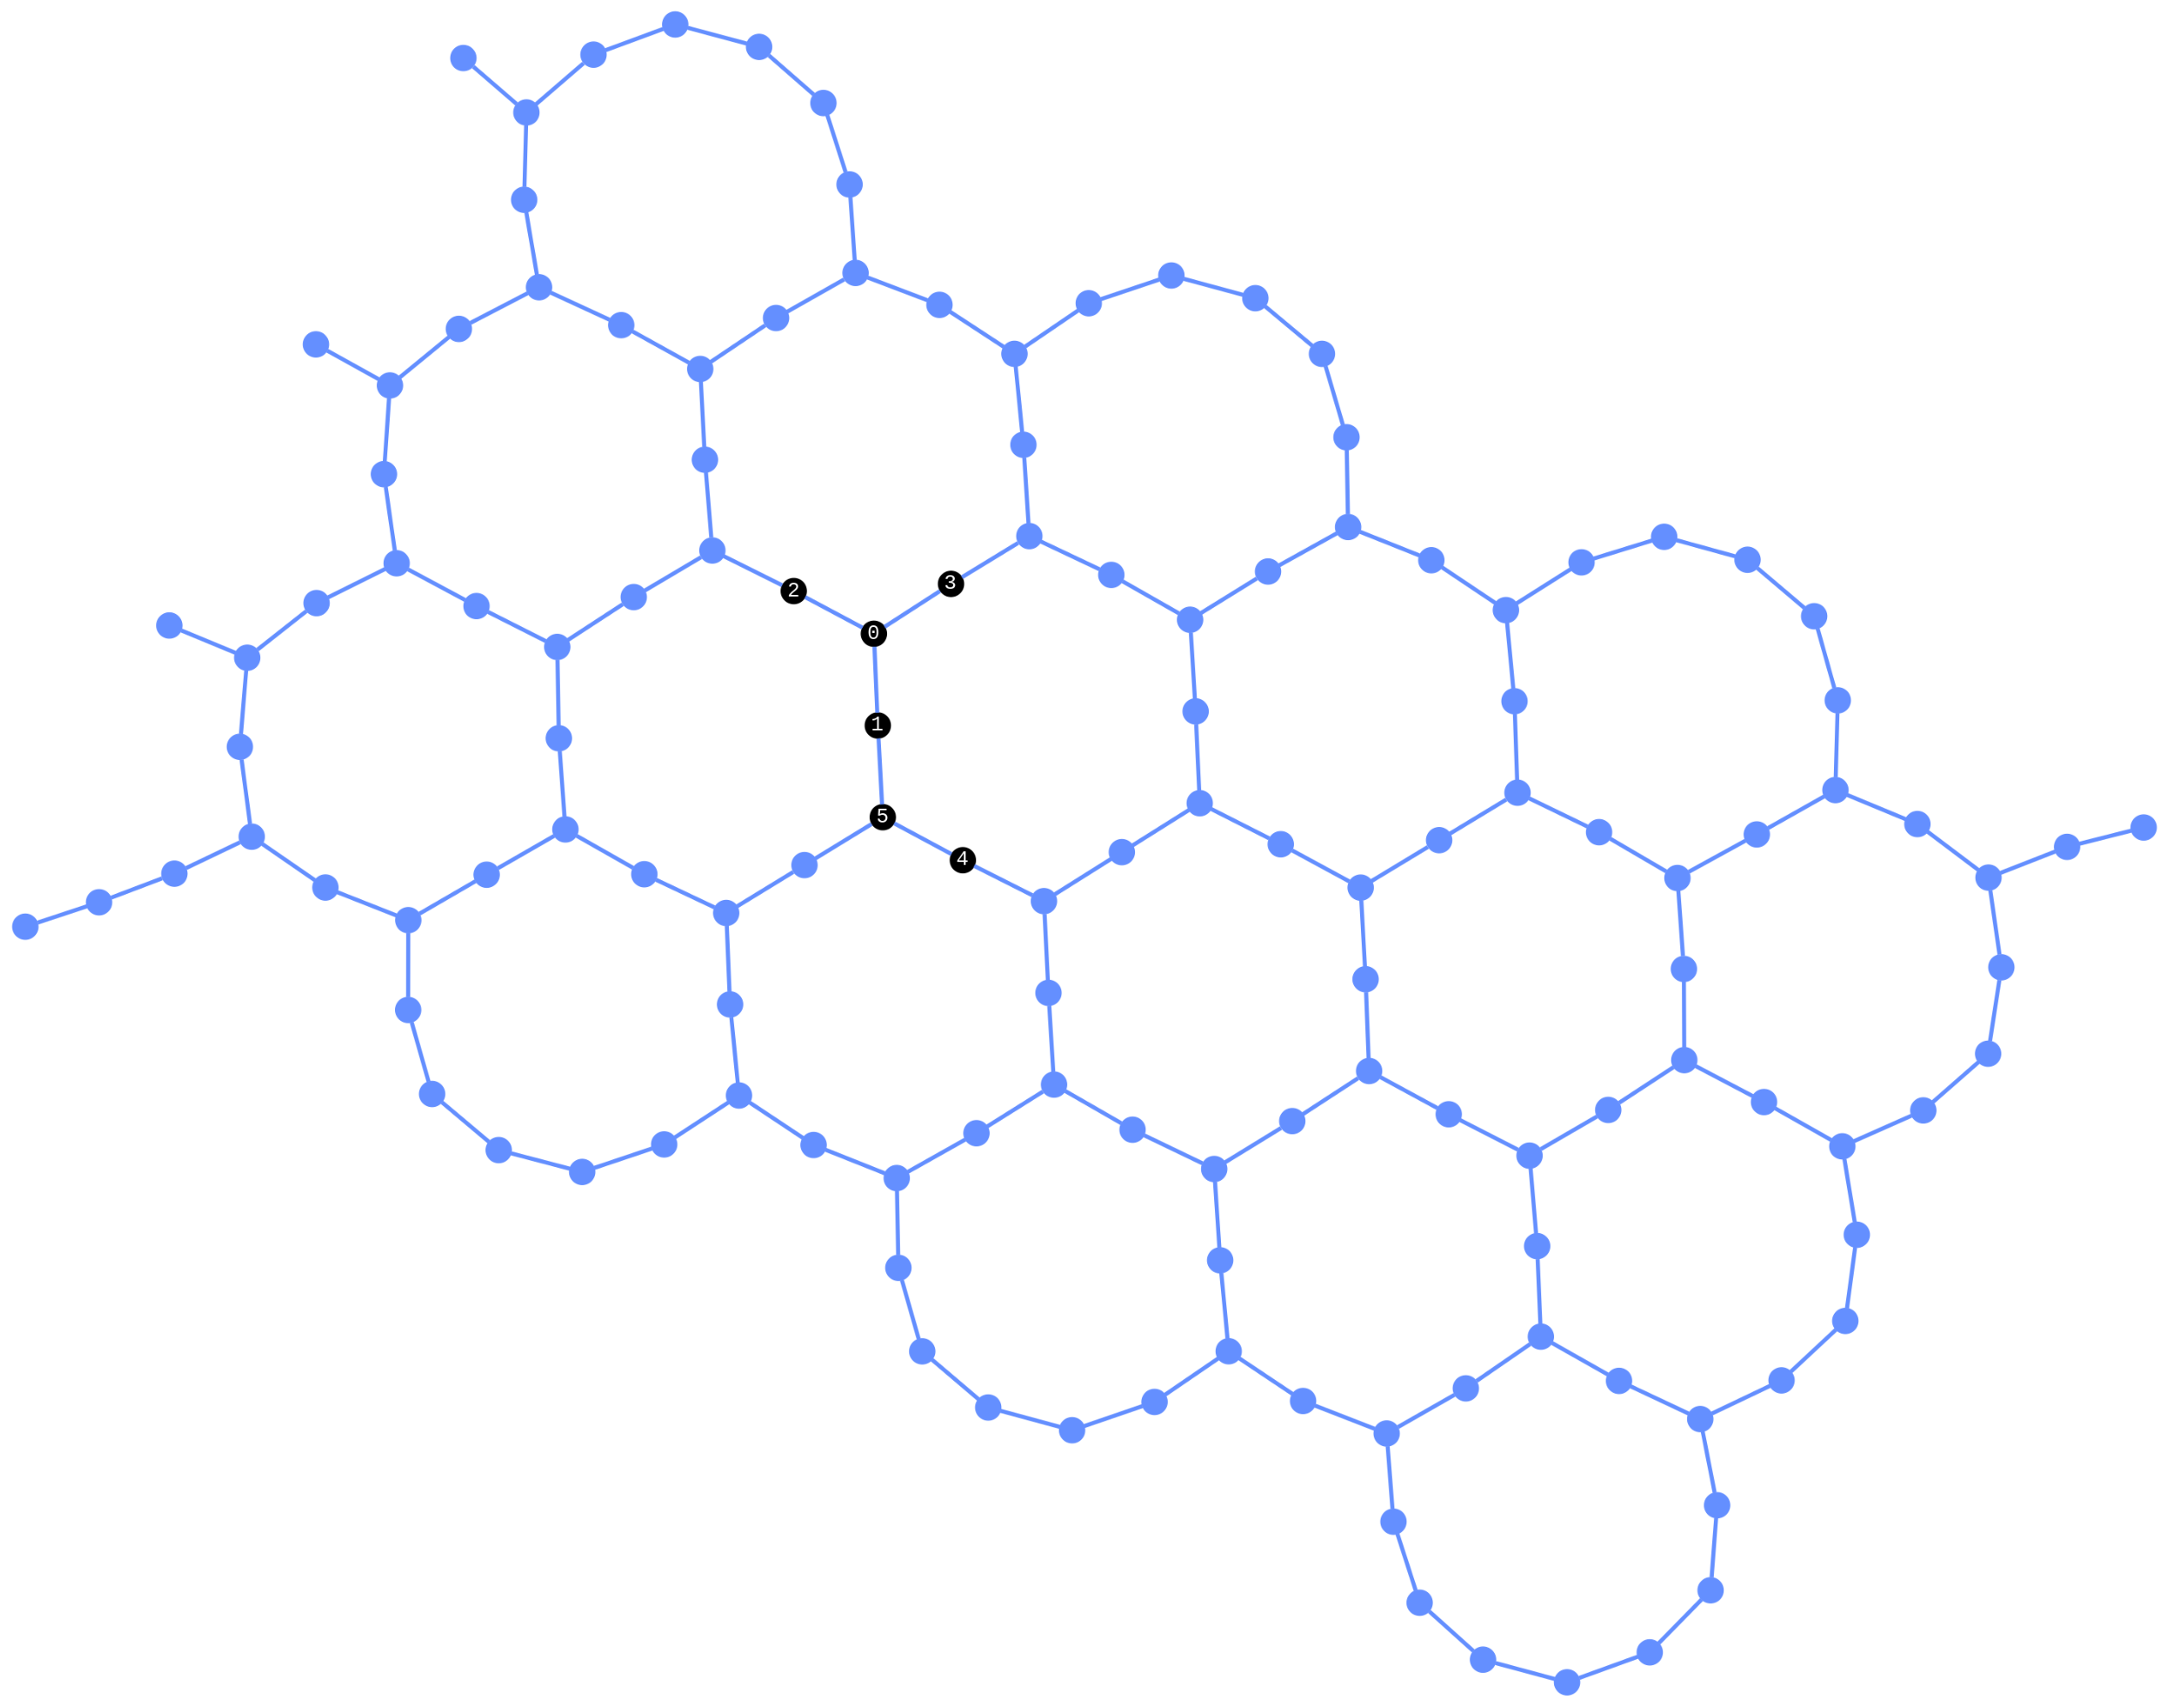

In [ ]:
list_stage_plugins("layout")

print("Plugins run by default layout stage")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, layout_method='default', seed_transpiler=seed)
    qc_tr = pm.run(qc)

    for controller_group in pm.layout.to_flow_controller().tasks:
        tasks = getattr(controller_group, "tasks", [])
        for task in tasks:
            print(" - " , str(type(task).__name__))
    print(qc_tr.layout.final_index_layout())
    display(plot_circuit_layout(pm.run(qc), backend))

In [ ]:
for option in list_stage_plugins("layout"):
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, layout_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)

    print(f"Layout method = {option}")
    print(f"Score: {score:.6f}")
    print(f"Layout: {qc_tr.layout.final_index_layout()}\n")

Layout method = default
Score: 0.276088
Layout: [85, 84, 83, 93, 73, 82]

Layout method = dense
Score: 0.189147
Layout: [37, 52, 51, 49, 56, 50]

Layout method = sabre
Score: 0.276088
Layout: [85, 84, 83, 93, 73, 82]

Layout method = trivial
Score: 0.334350
Layout: [0, 1, 2, 4, 5, 3]



In [ ]:
list_stage_plugins("routing")

print("Number of each gates of transpiled circuit and the score")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, routing_method='basic', seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")

Number of each gates of transpiled circuit and the score

Optimization level 0:
rz : 406
sx : 192
cz : 81
x : 1
Score: 0.443191

Optimization level 1:
rz : 167
sx : 95
cz : 48
Score: 0.133092

Optimization level 2:
sx : 95
rz : 90
cz : 48
Score: 0.133092

Optimization level 3:
sx : 92
rz : 79
cz : 42
x : 1
Score: 0.121427


Plugins run by basic routing stage

Optimization level 0:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap


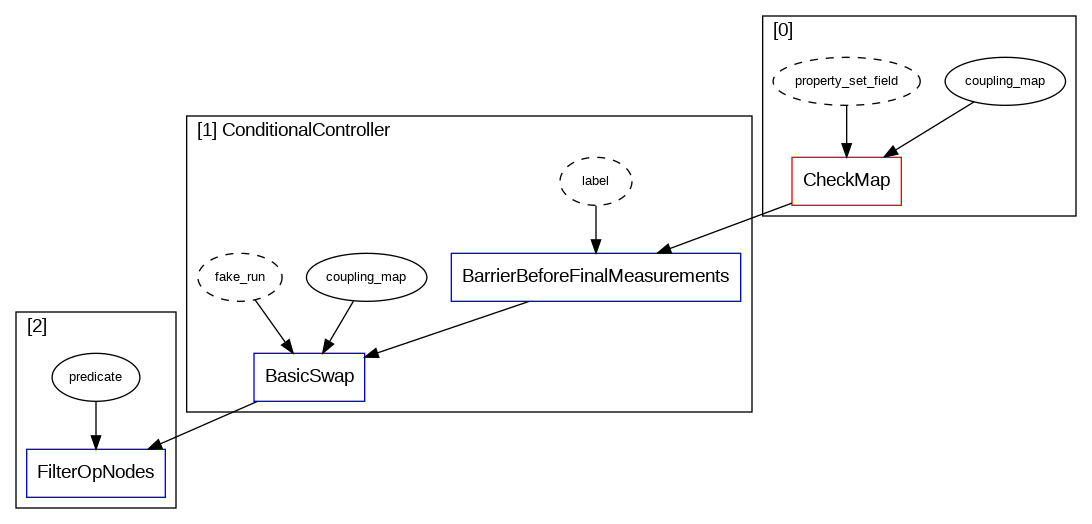

[4, 1, 2, 0, 5, 3]

Optimization level 1:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
 -  VF2PostLayout
 -  ApplyLayout


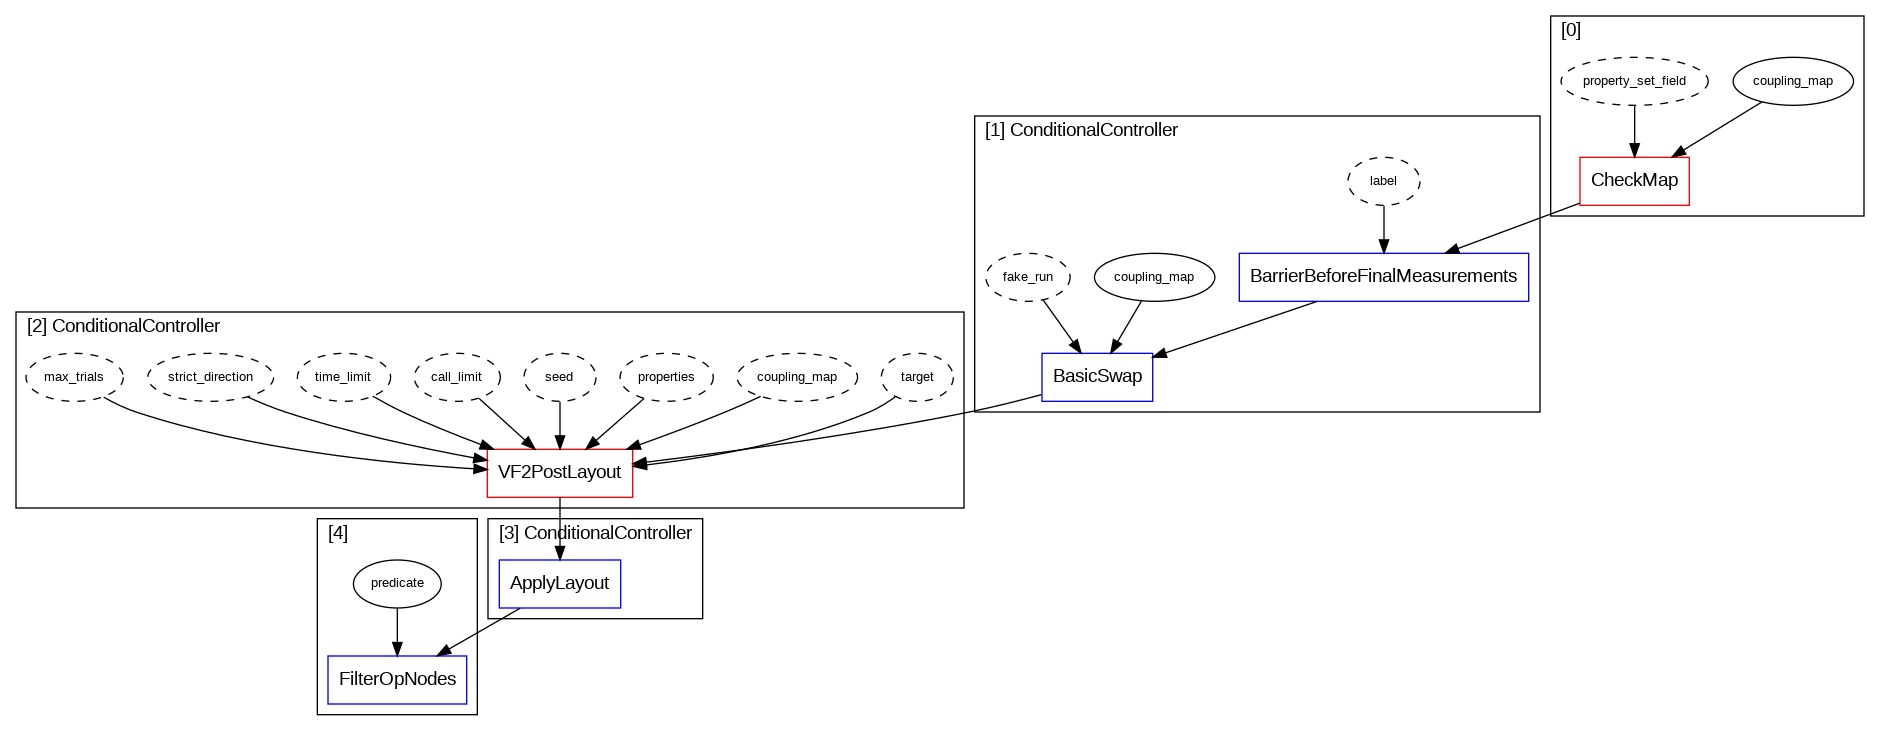

[99, 110, 97, 96, 92, 98]

Optimization level 2:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
 -  VF2PostLayout
 -  ApplyLayout


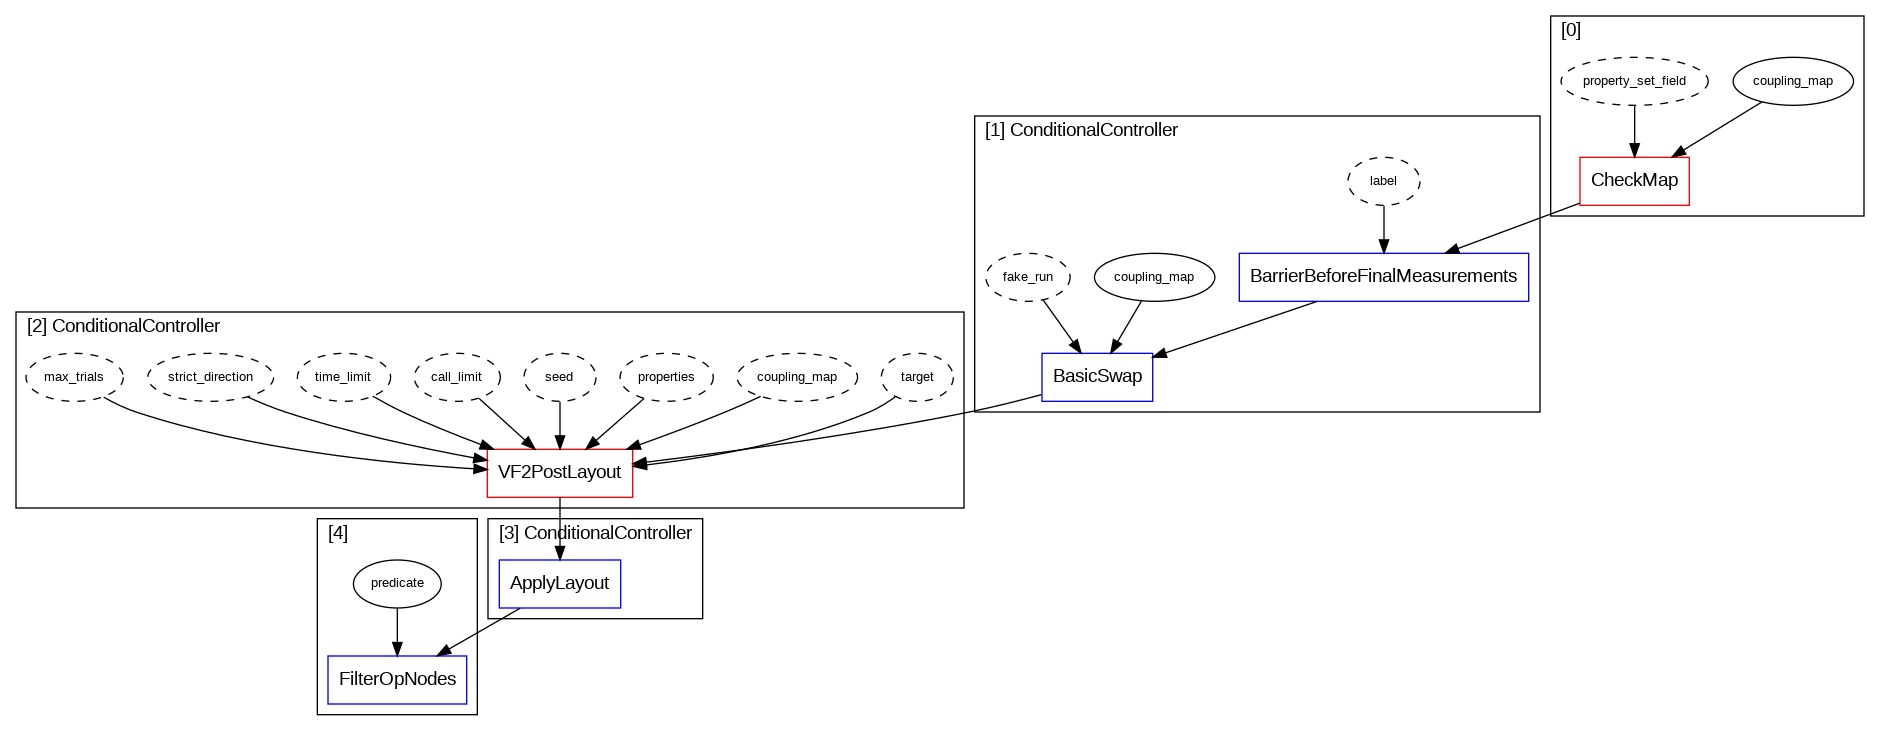

[99, 110, 97, 96, 92, 98]

Optimization level 3:
 -  BarrierBeforeFinalMeasurements
 -  BasicSwap
 -  VF2PostLayout
 -  ApplyLayout


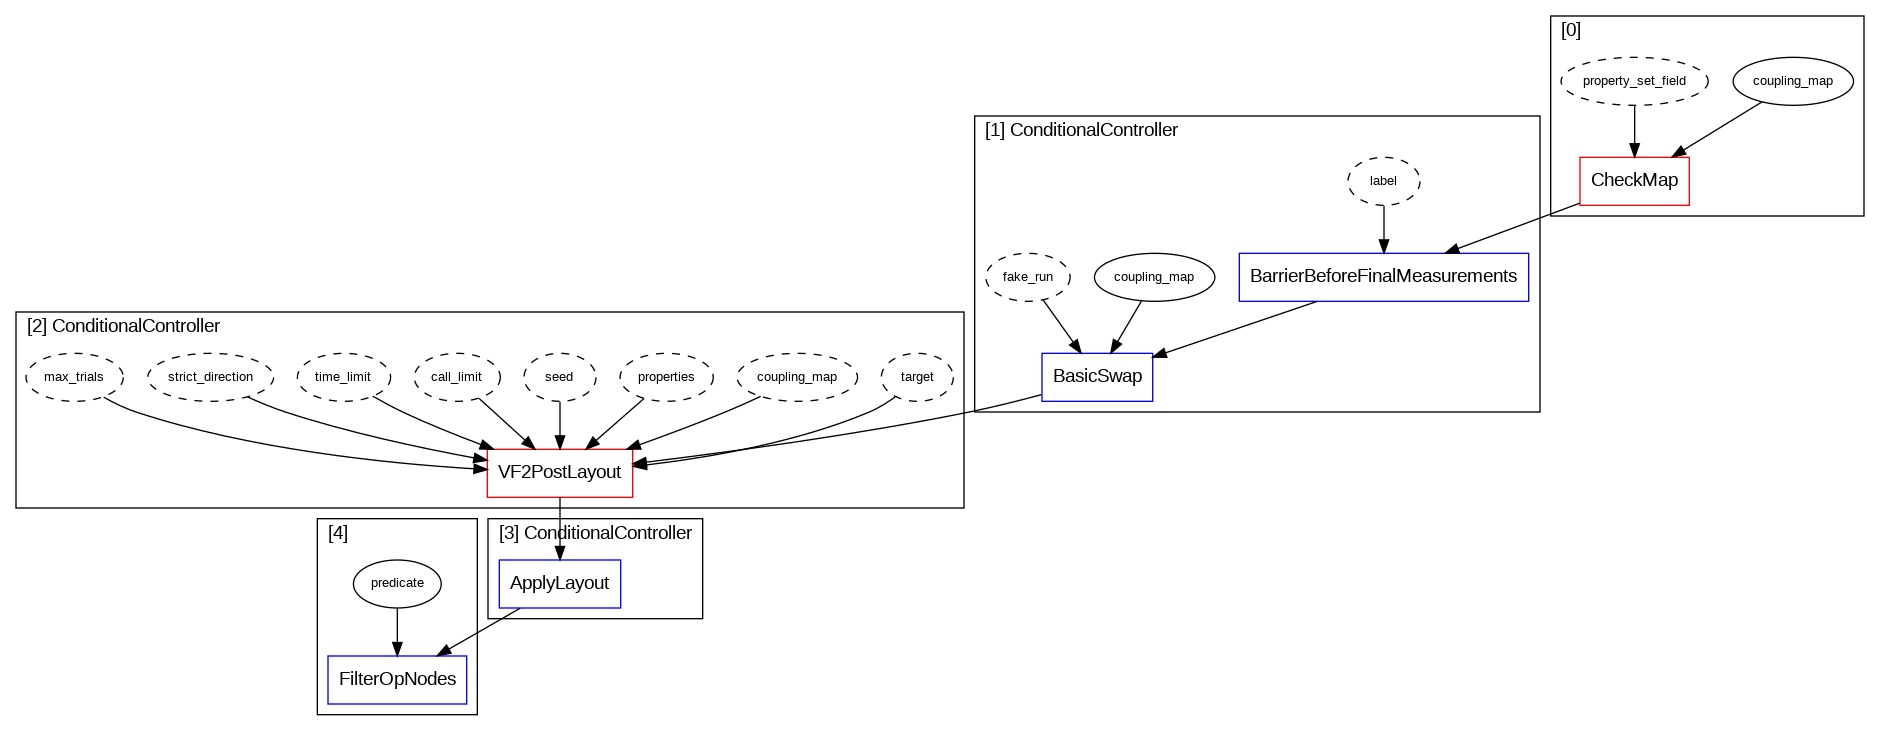

[99, 110, 97, 96, 92, 98]


In [ ]:
print("Plugins run by basic routing stage")
print("=================================")
for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, routing_method='basic', seed_transpiler=seed)

    for controller_group in pm.routing.to_flow_controller().tasks:
        tasks = getattr(controller_group, "tasks", [])
        for task in tasks:
            print(" - " , str(type(task).__name__))
    display(pm.routing.draw())
    print(pm.run(qc).layout.final_index_layout())

In [ ]:
## process stopped due to lookahead
options = ['basic','sabre', 'stochastic']

for option in options:
    print(f"Layout option = {option}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, routing_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)

    print(f"Score: {score:.6f}")

    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print("\n")

Layout option = basic:
Score: 0.121427
sx : 92
rz : 79
cz : 42
x : 1


Layout option = sabre:
Score: 0.096126
sx : 74
rz : 65
cz : 37
x : 1


Layout option = stochastic:
Score: 0.169540
sx : 137
rz : 108
cz : 66




In [ ]:
list_stage_plugins("translation")

print("Number of each gates of transpiled circuit")
print("=================================")

for i in range(4):
    print(f"\nOptimization level {i}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=i, translation_method='translator', seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")

Number of each gates of transpiled circuit

Optimization level 0:
rz : 394
sx : 186
cz : 78
x : 1
Score: 0.378009

Optimization level 1:
rz : 131
sx : 77
cz : 39
Score: 0.100534

Optimization level 2:
sx : 77
rz : 71
cz : 39
Score: 0.100534

Optimization level 3:
sx : 74
rz : 65
cz : 37
x : 1
Score: 0.096126


In [ ]:
options = ['translator', 'synthesis']

print("Number of each gates of transpiled circuit")
print("=================================")

for option in options:
    print(f"Layout option = {option}:")
    pm = generate_preset_pass_manager(backend=backend, optimization_level=3, translation_method=option, seed_transpiler=seed)
    qc_tr = pm.run(qc)
    score = scoring(qc_tr, backend)
    for key, value in qc_tr.count_ops().items():
        print(key, ":", value)
    print(f"Score: {score:.6f}")
    print("\n")

Number of each gates of transpiled circuit
Layout option = translator:
sx : 74
rz : 65
cz : 37
x : 1
Score: 0.096126


Layout option = synthesis:
sx : 73
rz : 70
cz : 37
x : 12
Score: 0.099269




In [ ]:
tr_depths = []
tr_gate_counts = []
tr_scores = []

options = ['translator', 'synthesis']

for i in range(4):
    for option in options:
        pm = generate_preset_pass_manager(backend=backend, optimization_level=i, translation_method=option, seed_transpiler=seed)

        tr_depths.append(pm.run(qc).depth())
        tr_gate_counts.append(sum(pm.run(qc).count_ops().values()))
        tr_scores.append(scoring(pm.run(qc), backend))

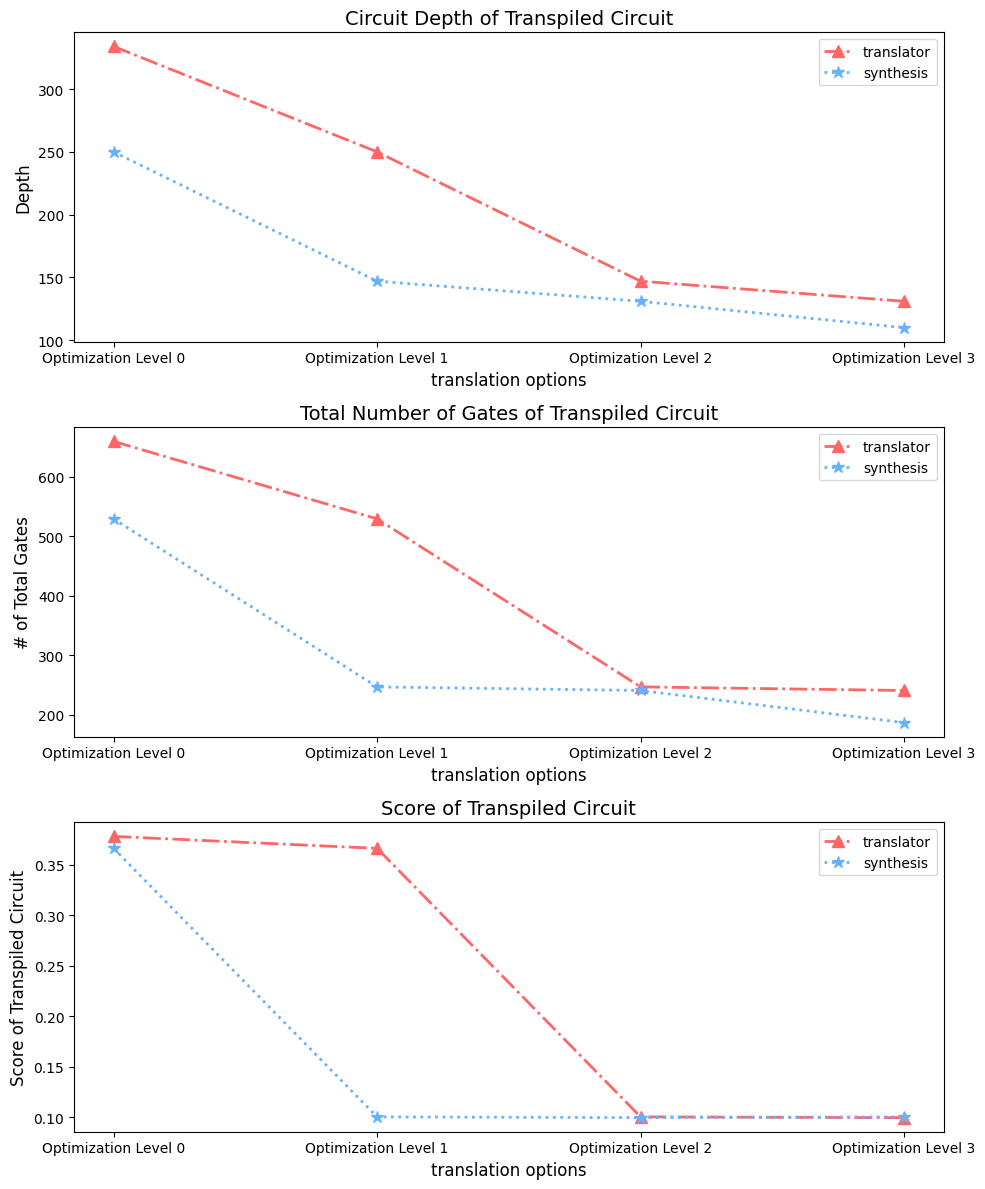

In [ ]:
colors = ['#FF6666', '#66B2FF']
markers = [ '^', '*']
linestyles = ['-.', ':']

opt_list = []
for i in range(4):
    opt_list.append(f"Optimization Level {i}")

ax = opt_list
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Circuit Depth
for i in range(2):
    ax1.plot(ax, tr_depths[i:i+4], label=options[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax1.set_xlabel("translation options", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(2):
    ax2.plot(ax, tr_gate_counts[i:i+4], label=options[i], marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("translation options", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Score of Transpiled Circuit
for i in range(2):
    ax3.plot(ax, tr_scores[i:i+4], label=options[i], marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("translation options", fontsize=12)
ax3.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax3.set_title("Score of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

fig.tight_layout()
plt.show()

In [ ]:
list_stage_plugins("optimization")

['default']

In [ ]:
tr_depths = []
tr_gate_counts = []
tr_scores = []

approximation_degree_list = np.linspace(0,1,10)
print(approximation_degree_list)

for i in range(4):
    for j in approximation_degree_list:
        pm = generate_preset_pass_manager(backend=backend, optimization_level=i, approximation_degree=j, seed_transpiler=seed)

        tr_depths.append(pm.run(qc).depth())
        tr_gate_counts.append(sum(pm.run(qc).count_ops().values()))
        tr_scores.append(scoring(pm.run(qc), backend))

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]


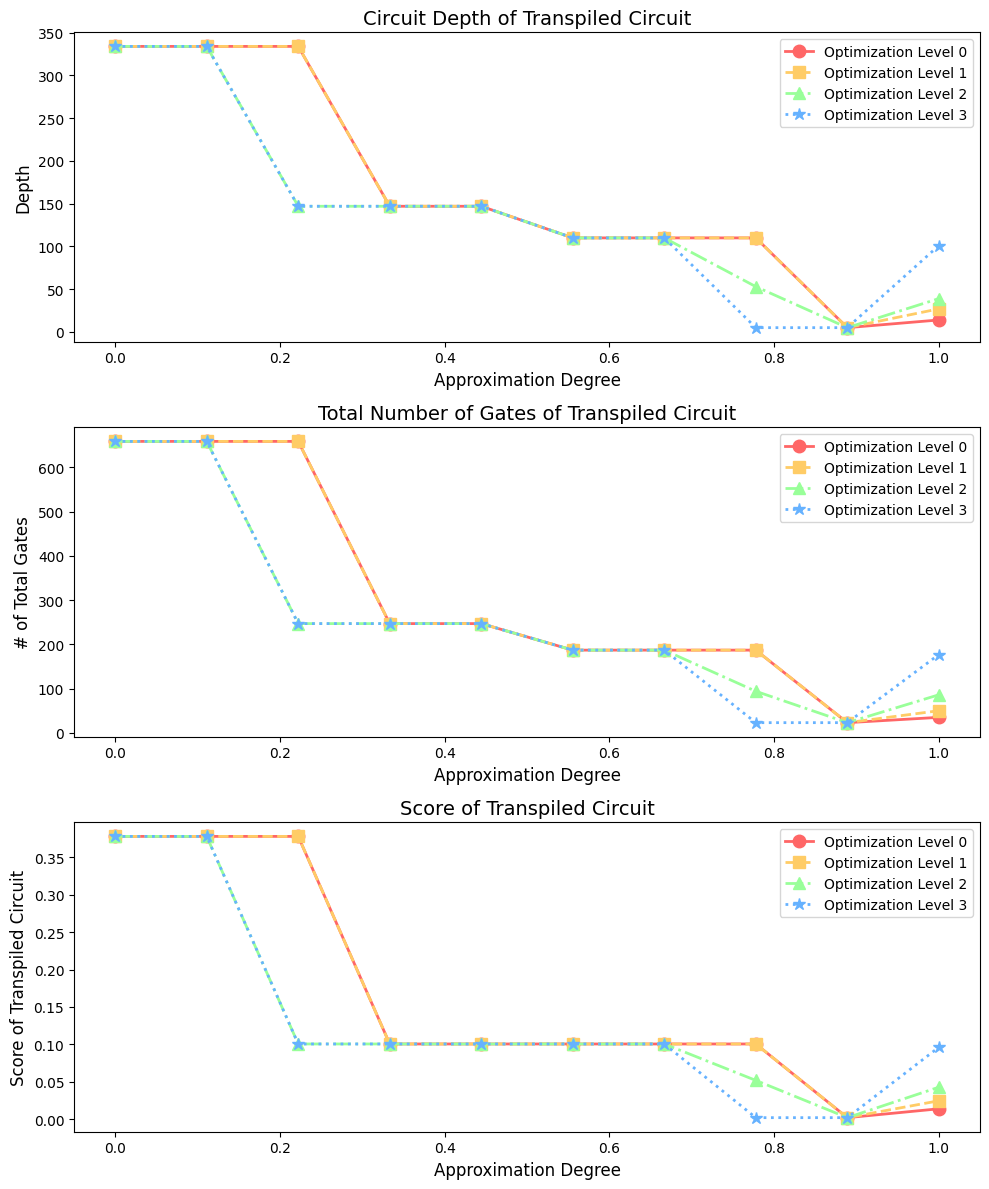

In [ ]:
colors = ['#FF6666', '#FFCC66', '#99FF99', '#66B2FF']
markers = ['o', 's', '^', '*']
linestyles = ['-', '--', '-.', ':']

ax = approximation_degree_list
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 12))

# Plot 1: Circuit Depth
for i in range(4):
    ax1.plot(ax, tr_depths[i::4], label=f"Optimization Level {i}", marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax1.set_xlabel("Approximation Degree", fontsize=12)
ax1.set_ylabel("Depth", fontsize=12)
ax1.set_title("Circuit Depth of Transpiled Circuit", fontsize=14)
ax1.legend(fontsize=10)

# Plot 2: Total Number of Gates
for i in range(4):
    ax2.plot(ax, tr_gate_counts[i::4], label=f"Optimization Level {i}", marker=markers[i], markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax2.set_xlabel("Approximation Degree", fontsize=12)
ax2.set_ylabel("# of Total Gates", fontsize=12)
ax2.set_title("Total Number of Gates of Transpiled Circuit", fontsize=14)
ax2.legend(fontsize=10)

# Plot 3: Score of Transpiled Circuit
for i in range(4):
    ax3.plot(ax, tr_scores[i::4], label=f"Optimization Level {i}", marker=markers[i],markersize=9, linestyle=linestyles[i], color=colors[i], linewidth=2)
ax3.set_xlabel("Approximation Degree", fontsize=12)
ax3.set_ylabel("Score of Transpiled Circuit", fontsize=12)
ax3.set_title("Score of Transpiled Circuit", fontsize=14)
ax3.legend(fontsize=10)

fig.tight_layout()
plt.show()

# Approximation maximal (0.0) to minimal (1.0)

In [ ]:
list_stage_plugins("scheduling")

['alap', 'asap', 'default']

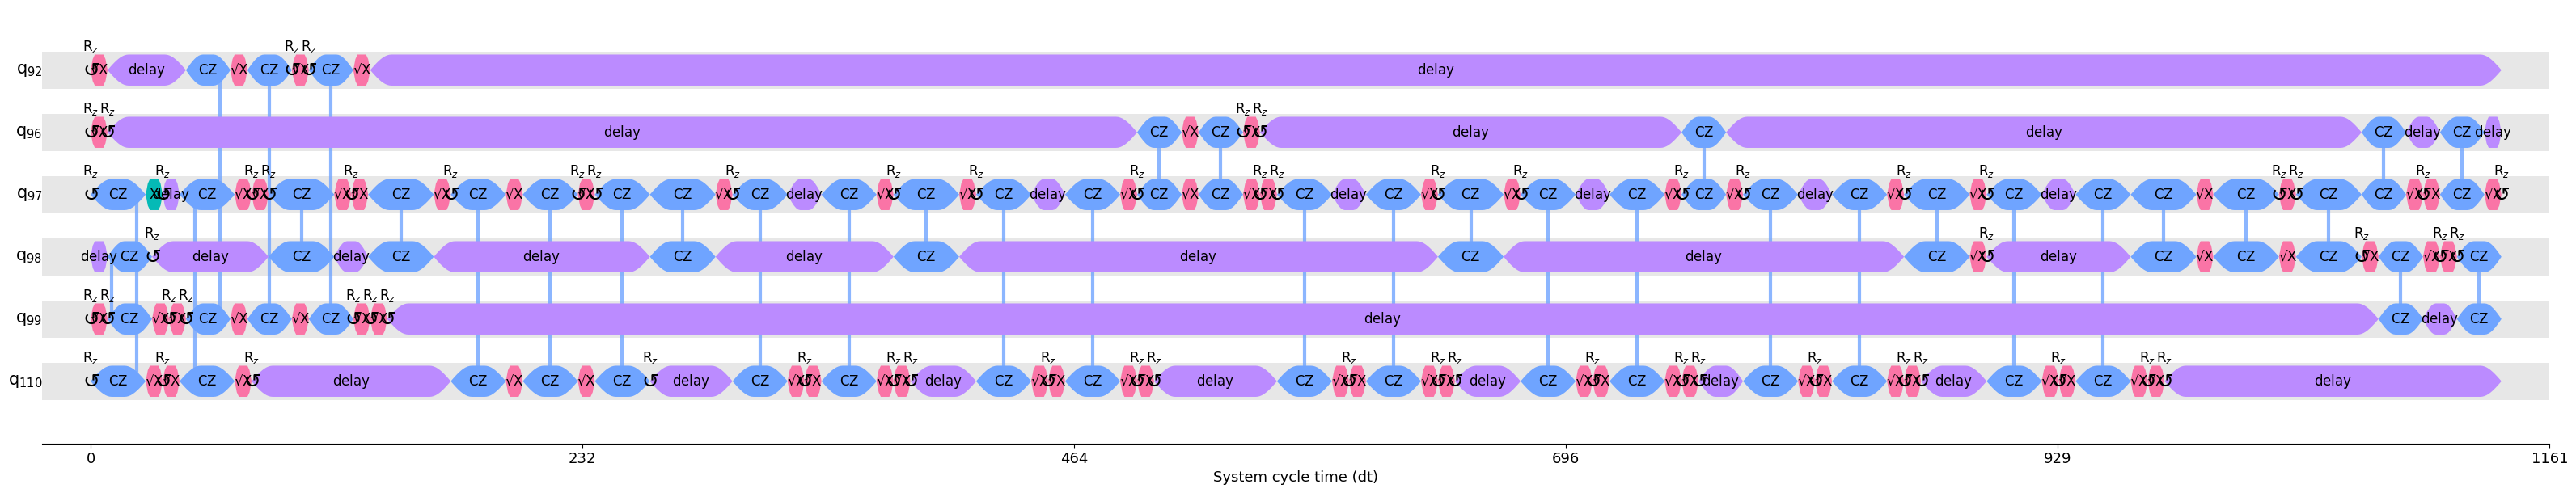

In [ ]:
backend_timing = backend.target.timing_constraints()
timing_constraints = TimingConstraints(
    granularity=backend_timing.granularity,
    min_length=backend_timing.min_length,
    pulse_alignment=backend_timing.pulse_alignment,
    acquire_alignment=backend_timing.acquire_alignment )

# Run with optimization level 3 and 'asap' scheduling pass
pm_asap = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    timing_constraints=timing_constraints,
    scheduling_method="asap",
    seed_transpiler=seed,
)

my_style = {
    'formatter.general.fig_width': 40,
    'formatter.general.fig_unit_height': 1,
}

draw(pm_asap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

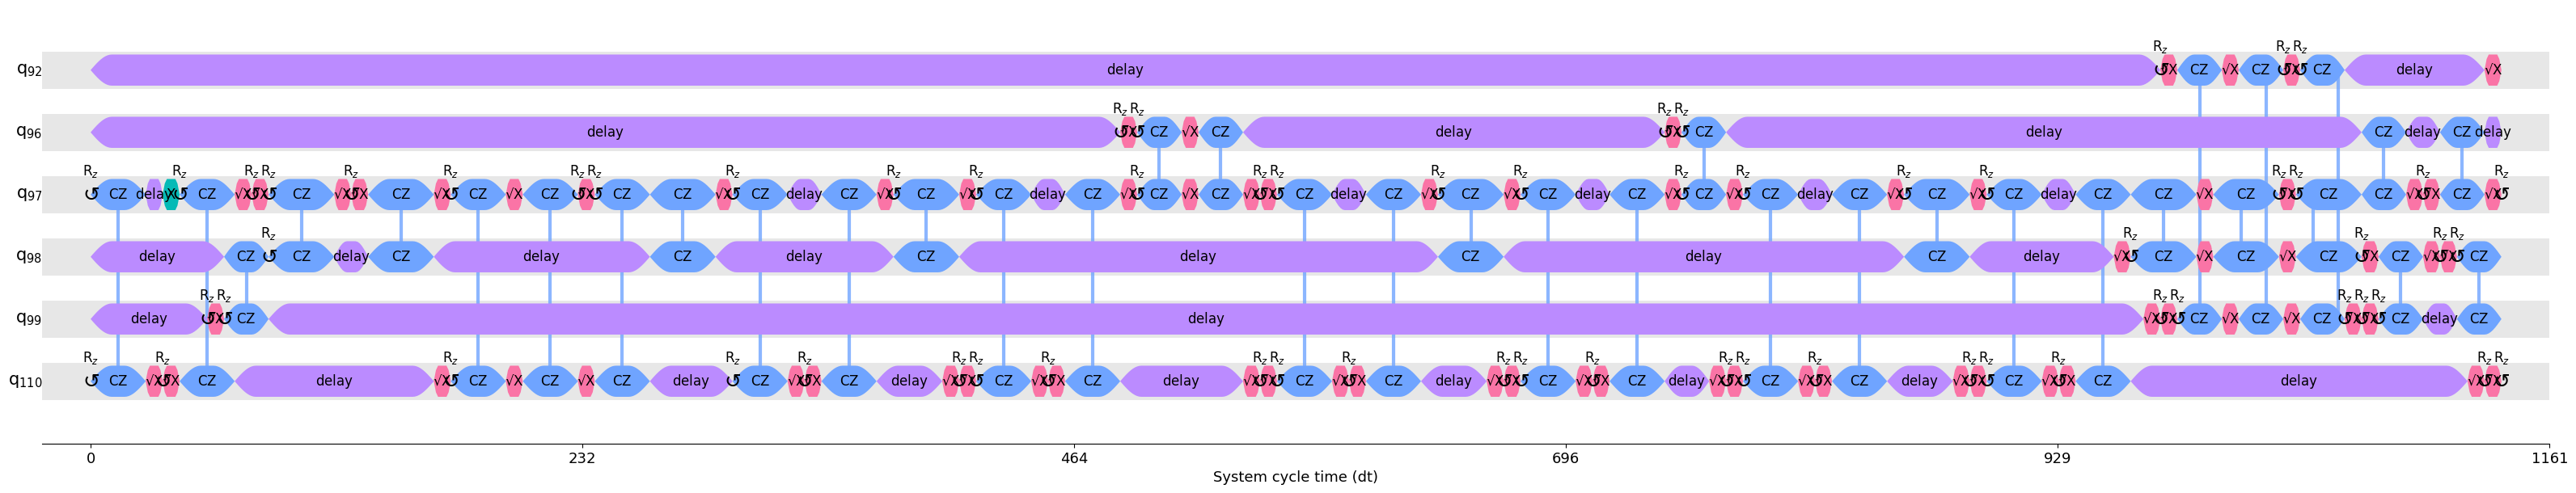

In [ ]:
pm_alap = generate_preset_pass_manager(
    optimization_level=3,
    backend=backend,
    timing_constraints=timing_constraints,
    scheduling_method="alap",
    seed_transpiler=seed,
)
draw(pm_alap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

In [ ]:
print("Score")
print("===============")
print(f"asap: {scoring(pm_asap.run(qc), backend):.6f}")
print(f"alap: {scoring(pm_alap.run(qc), backend):.6f}")

Score
asap: 0.211508
alap: 0.176675


In [ ]:
pm_ex4 = generate_preset_pass_manager(
    backend=backend,

    ### Write your code below here ###
    optimization_level=3,
    layout_method='sabre',
    routing_method='sabre',
    translation_method='synthesis',

    ### Don't change any code past this line ###
)

In [ ]:
# Submit your answer using following code

grade_lab2_ex4(pm_ex4)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


In [ ]:
X = XGate()
Y = YGate()

dd_sequence = [X, Y, X, Y]

backend=FakeTorino()

target = backend.target
# print(target.num_qubits)

y_gate_properties = {}
for qubit in range(target.num_qubits):
    y_gate_properties.update(
        {
            (qubit,): InstructionProperties(
                duration=target["x"][(qubit,)].duration,
                error=target["x"][(qubit,)].error,
            )
        }
    )

target.add_instruction(YGate(), y_gate_properties)

133


In [ ]:
dd_pm = PassManager(
    [
        ## your code here
        ASAPScheduleAnalysis(),
        PadDynamicalDecoupling(dd_sequence=dd_sequence)
        ## your code here

    ]
)

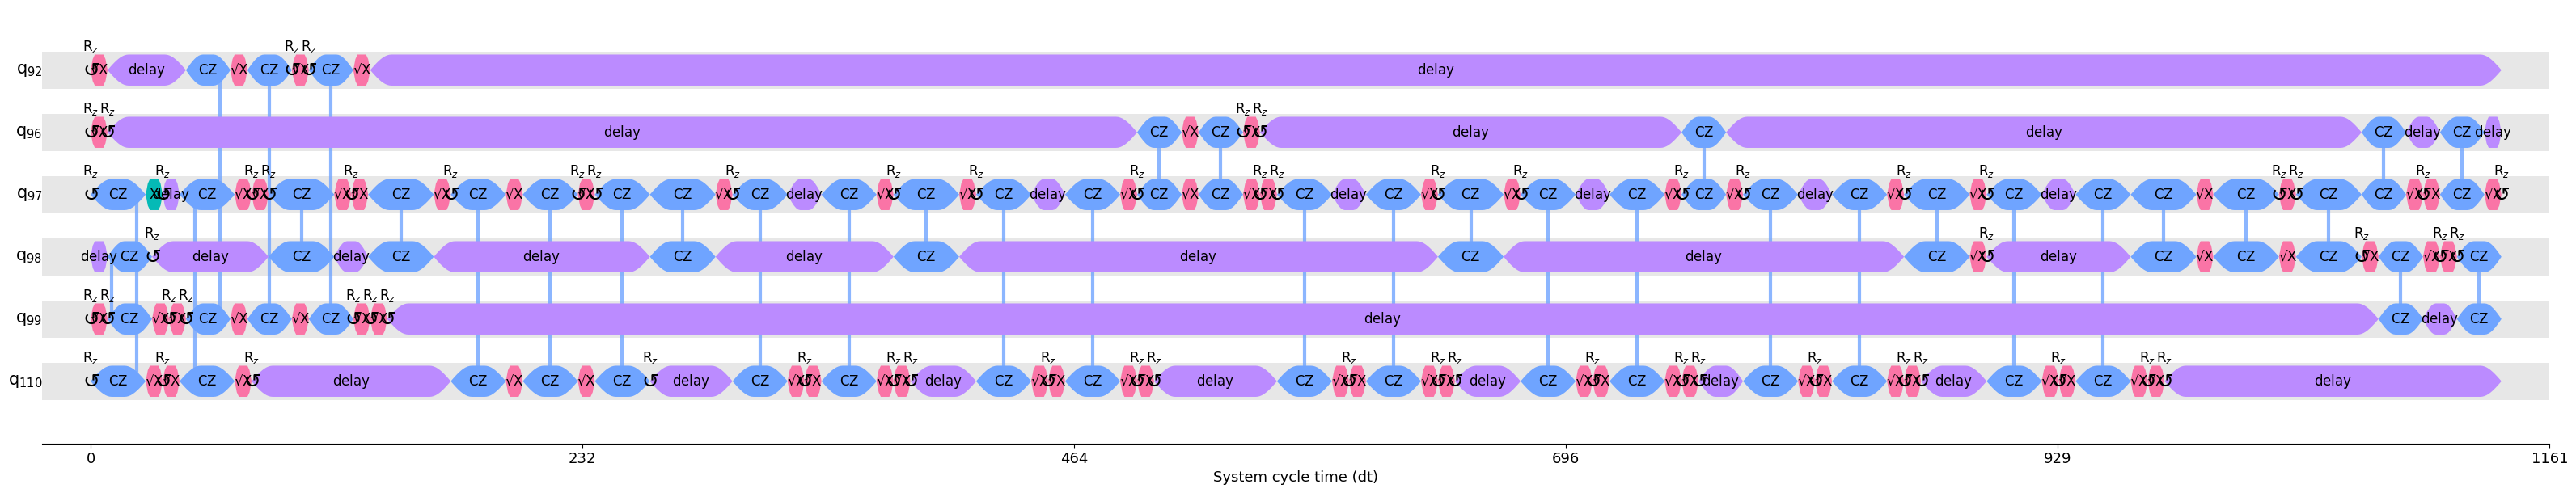

In [ ]:
draw(pm_asap.run(qc), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

In [ ]:
staged_pm_dd = StagedPassManager(
    stages=["scheduling"],
    scheduling=dd_pm
)
qc_tr = pm_asap.run(qc)

# draw(staged_pm_dd.run(qc_tr), style=IQXStandard(**my_style), show_idle=False, show_delays=True)

In [ ]:
# Submit your answer using following code

grade_lab2_ex5(staged_pm_dd)

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.
